#### Loading the necessary libraries

In [1]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from scipy.stats import probplot
from scipy.stats import zscore
import scipy.stats as stats
import math
from scipy.stats import ttest_1samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm 
from scipy.stats import f_oneway, kruskal, mannwhitneyu , levene, ttest_ind, kruskal, mannwhitneyu
from pingouin import welch_anova
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.preprocessing as sp
import statsmodels.stats.outliers_influence as smof
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\kaveri\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Adding some functions to beautify the graphical visualization created in this worksheet.

In [2]:
from matplotlib import rcParams, cycler
rcParams['figure.figsize'] = 8,5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 1.5
rcParams['axes.prop_cycle'] = cycler(color=['#424242'])
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#### Reading the dataframe for Auto Insurance in US as data

In [2]:
data = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')
data.head()

<IPython.core.display.Javascript object>

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Performing EDA
### 1. Variable Identification.

In [ ]:
'Coverage','Education','EmploymentStatus','Income', 'Marital Status', 'Months Since Last Claim',        
'Months Since Policy Inception','Number of Open Complaints','Number of Policies','Renew Offer Type',          'Vehicle Class',               'Vehicle Size',              'Monthly Premium Auto_boxcox','Total Claim Amount_boxcox',

In [7]:
li=[ 'Coverage',
       'Education',  'EmploymentStatus', 
       'Income',  'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Renew Offer Type',  'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size','Customer Lifetime Value']
print(len(li))

15


We have read the data and this looks like the demograhic details of the customers of the Auto Insurance company.
Lets check the shape of the data.

In [8]:
f=data[li]
    

In [4]:
data.shape

(9134, 24)

In [11]:
f.to_csv('raw_data.csv')

Looks like the data has 24 columns, lets see how they are stand

In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

Lets understand the data first and look at each and every column and try and find which column could be our Target column.

1.	Customer - Unique customer ID
2.	State - US province to where the customer belongs to 
3.	Response - Refers to whether customers have responded to marketing calls or not 
4.	Coverage - Nature of insurance coverage 
5.	Education - Level of education of the customer
6.	Effective to Date - Expiry date of policy
7.	Gender - Gender of the customer 
8.	Employment Status - Current Employment status of the customer
9.	Income - Customer annual income in USD
10.	Location Code - Type of location where customer lives 
11.	Marital Status - Marital status of the customer
12.	Vehicle Size - Size of vehicle
13.	Vehicle Class - Type of the vehicle
14.	Sales Channel - Channel of sales through which the customer was retained
15.	Renew Offer Type - Offer given during renewal 
16.	Total Claim Amount - Amount claimed till date
17.	Monthly Premium Auto - Monthly premium for auto insurance 
18.	Months Since Last Claim - No. of months before which the last claim was made 
19.	Months Since Policy Inception - No. of months before which the policy commenced 
20.	Number of Open Complaints - No. of unresolved complaints from the customer 
21.	Number of Policies - No. of policies with the current customer 
22.	Policy Type - Type of policy 
23.	Policy - Policy sub category 
24.	Customer Life Time Value - CLV of the customer for the auto insurance company


It looks like we are expected to define the Customer Lifetime Value based on a customer's demographic data and his/her history of claims.
Thus we agree that Customer Lifetime Value(CLV) becomes our target column to be predicted.

Lets try and understand these columns further

#### 1A. Numerical Variable Identification.

In [7]:
data.describe() #Details out the numerical columns by default

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


The describe function above has given us the 5point summary for all our numerical columns. 

Highlights:
1. We can se the 25%(1st quartile) income being 0 which can be said that those people were the unemployed customers, this is a large number of employees who do not have a steady income posing a rish to the company.
2. With just an overview, we can say that our target column, the CLV along with Income, Total Claim Amt, the Monthly premium is highly right skewed.
3. The max no. of Months Since Policy Inception is 99 i.e. ~8 years since the customers have been associated with the company. This proves that the Auto Insurance company could be reliable and customer friednly.

##### Are all of the above varibles actually continuous numerical variables?
Looks like the Number of Open Complaints and Number of Policies but looks like the values will be discreet. We will confirm this:

In [8]:
print(data['Number of Open Complaints'].value_counts())
print(data['Number of Policies'].value_counts())

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


Looking at the columns and the dtypes, the Number of Open Complaints and the Number of Policies look like discreet values which can be considered as Categorical data and not numerical.

Since rest of the numerical columns look like continuous variables, we can now list down our numerical columns.

In [3]:
num_cols = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Total Claim Amount']

We can now see how the numerical columns are placed, and with just an overview, we can say that our target column, the CLV along with Income, Total Claim Amt, the Monthly premium is highly right skewed.
Lets try and validate this statement

In [10]:
data[num_cols].skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Total Claim Amount               1.714966
dtype: float64

Looking at the skewness of the numerical columns, the data looks highly right skewed especially the Customer Lifetime Value(CLV) which is our target column

In [11]:
data[num_cols].kurt()

Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Total Claim Amount                5.979401
dtype: float64

The kurtosis results also corresponds to the skewness as the CLV's right tail has maxiumum extreme values

Now lets see if we hav eany null or special values in the data

In [12]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Looks like we have no null values in the data. 

#### 1B. Categorical Variable Identification.

In [13]:
data.describe(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,UV86903,California,No,Basic,Bachelor,01-10-2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


1. With this summary we can identify the unique values are present in each columns. Here the 'top' and 'freq' shows the name & count of the most frequent element in variables.
2. As in the response coloumn it is clearly observed that about more than 80% people's respose is 'NO'
3. More than  50% people have the Basic Coverage
4. About more than 60% of people own Medsize Vehicle

Lets try to find if there are any special characters in the categorical columns. We have included the Number of open Policies and Number of Open Complaints

In [14]:
cat_cols = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender','Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
            'Number of Open Complaints', 'Number of Policies']

In [15]:
for i in cat_cols:
    print(i)
    print(data[i].value_counts(), '\n')

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64 

Response
No     7826
Yes    1308
Name: Response, dtype: int64 

Coverage
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64 

Gender
F    4658
M    4476
Name: Gender, dtype: int64 

Location Code
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64 

Marital Status
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64 

Policy Type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dty

There are no special characters in any of the categorical columns. We will now proceed with Univariate Analysis

### 2. Univariate Analysis(Numerical)
#### 2A. Univariate Analysis(Numerical)

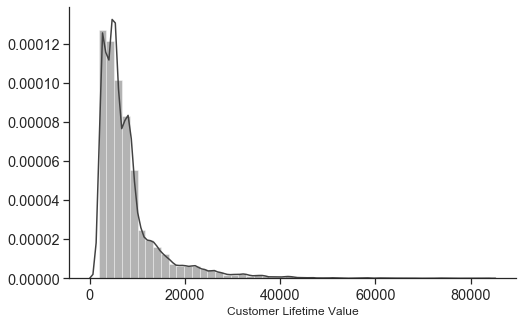

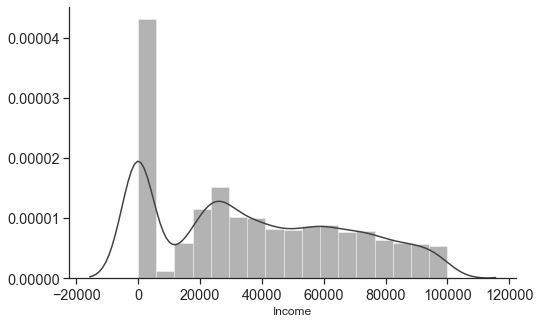

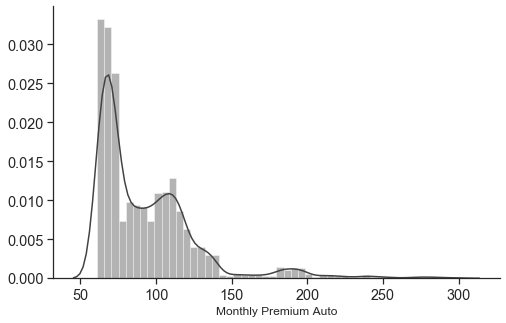

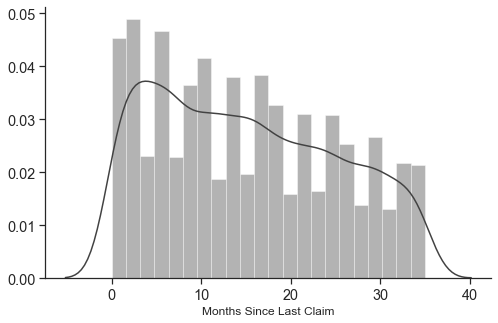

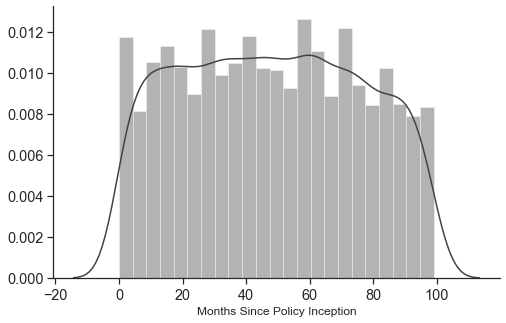

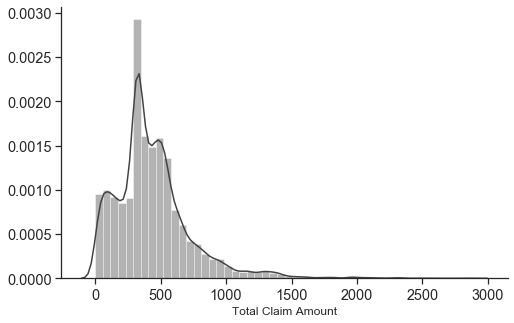

In [16]:
for j in num_cols:
    sns.distplot(data[j])
    plt.show()

Observation:
Thus we can confirm that the numerical columns are highly right skewed and show strong kurtosis. This will have to be treated before we proceed for model making.

#### 2B. Univariate Analysis(Categorical)

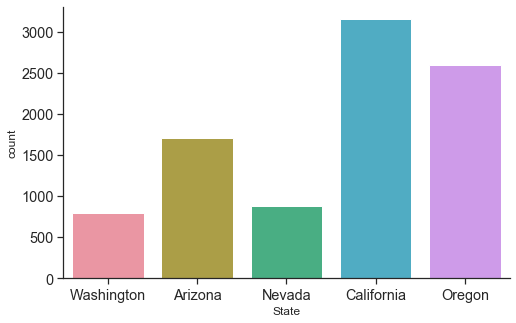

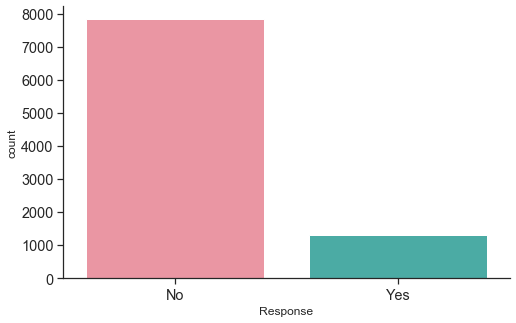

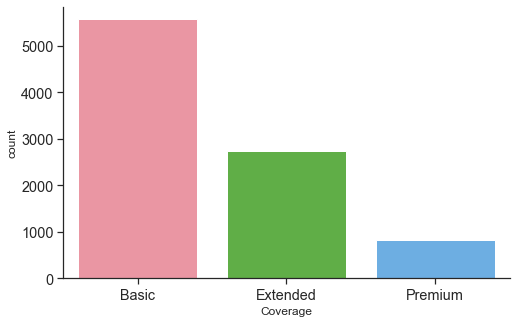

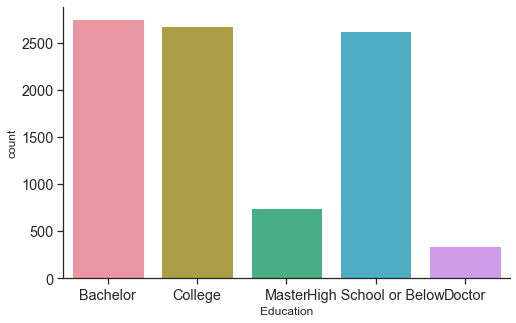

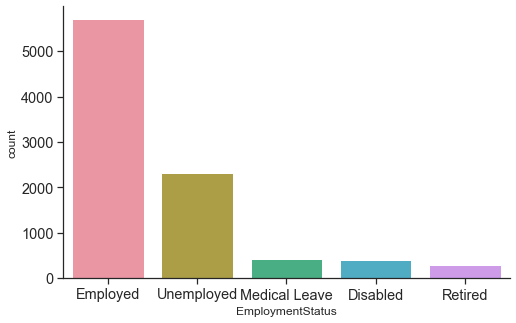

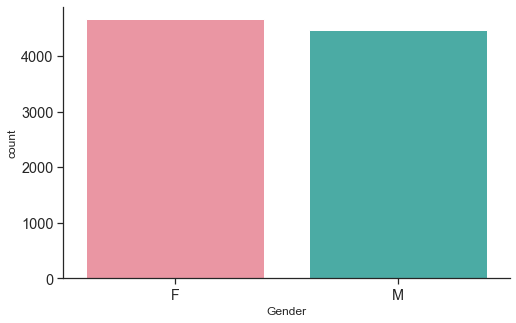

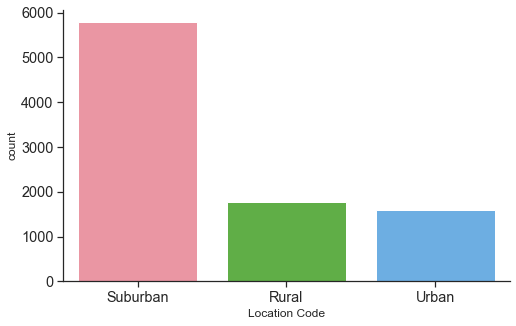

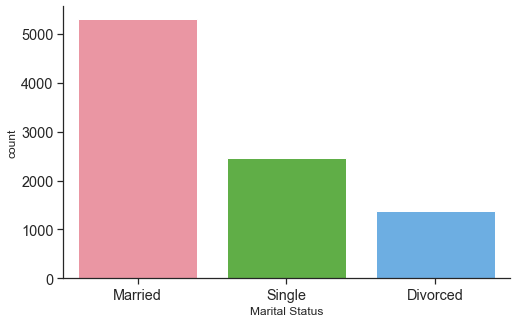

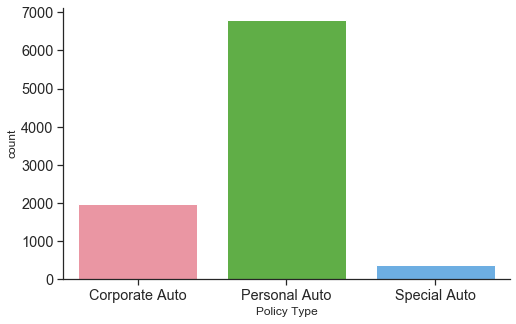

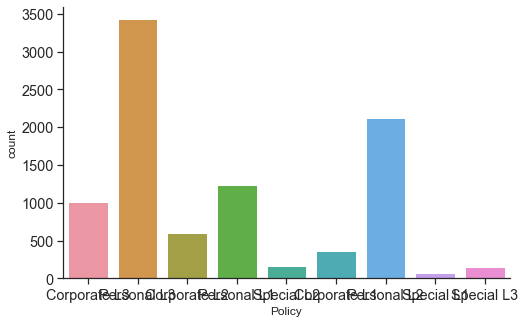

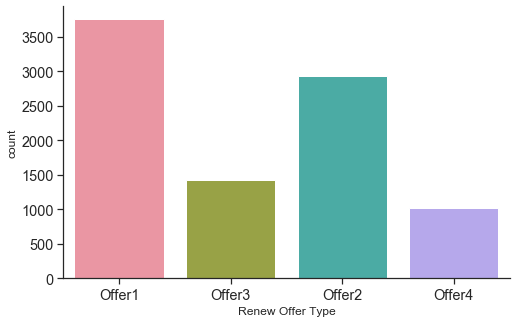

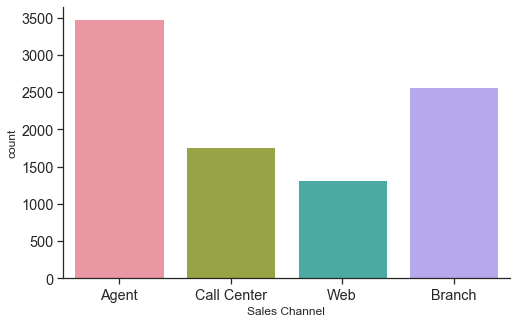

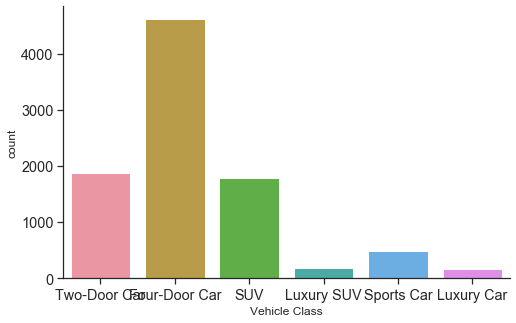

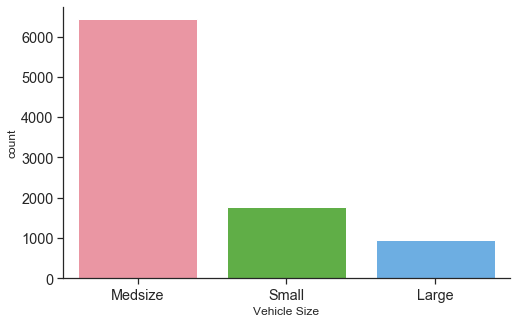

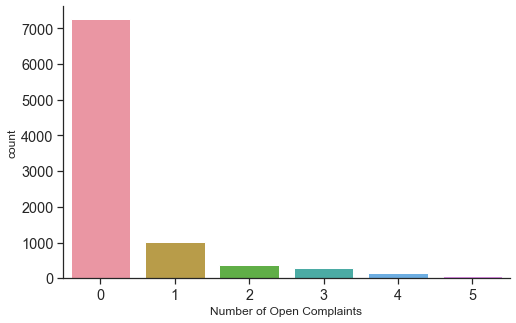

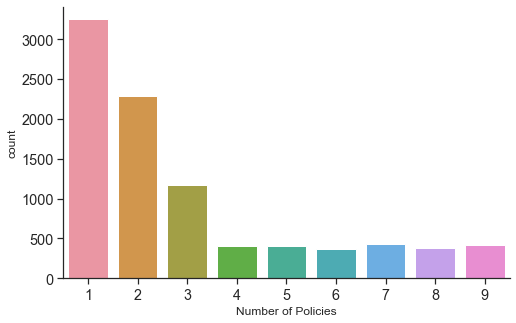

In [17]:
for i in cat_cols:
    sns.countplot(data[i])
    plt.show()

Observations:
1. California has maximum number of customers
2. Count of People  responded 'No' are  significantly more than 'Yes' 
3. Count of people with basic coverage is more
4. Doctors seems to be in low count for the insurance
5. People from suburban area having the insurance are more than rural Urban
6. No significant difference between Female and Male count
7. Personal auto policy type is chosen by maximum people
8. People having the midsize vehicle are more than small and large

#### 2C.Temporal Variables(Eg: Datetime Variables)


What about the Effective to date, this columns gives us the date when the customer's policy is going to end.

In [18]:
data['Effective To Date'].dtypes

dtype('O')

In [19]:
data['Effective To Date'].head()

0     2/24/2011
1     1/31/2011
2     2/19/2011
3     1/20/2011
4    02-03-2011
Name: Effective To Date, dtype: object

The date seems to be of 2011 however, its not in the same format. We will change the format first and then the data type to Date-time.

In [20]:
data['Effective To Date'] = data['Effective To Date'].str.replace('-', '/')

In [21]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [22]:
data['Effective To Date'].dtypes

dtype('<M8[ns]')

In [23]:
data['Effective To Date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective To Date, dtype: datetime64[ns]

In [24]:
data['Effective To Date'].tail()

9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective To Date, dtype: datetime64[ns]

Now we have all the dates in the same format. Lets try to understand this column better.

In [25]:
data['Effective To Date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-01-28    169
2011-02-26    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-01-07    151
2011-01-25    151
2011-02-11    151
2011-01-08    149
2011-02-02    149
2011-02-18    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-13    145
2011-01-30    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-24    139
2011-02-16    139
2011-02-13    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

If you see clearly, all the customers in the database have their policies expiring in the month of Jan & Feb of 2011. 
This means that these customers will be our potential customers for renewal when their policy expires.
Which also gives us the scope to sell better polices and products to them.


Now that we have identified our Target variable and understood all the categorical, Numerical and Date columns. We can define our Objective for this study and proceed with the clean data for explorartion.

Before stating the objective, we will close some loose ends and define the assumptions for this study:
    Assumptions:
1.	Maximum part of the Customer Lifetime value is product of Monthly premium & estimated number of months.
2.	No. of policies are the policy renewed by the customer for the same car.
3.	Effective to date is giving us the list of the policies expiring in the month of Jan & Feb 2011.
4.	Offer types are the offers that pitched to the customers while renewing or purchasing the insurance

# Objective: Predict the Customer Lifetime Value to define the customer demographics for up-selling the new products.

### 3.Bivariate Analysis

In [26]:
data[num_cols].corr()    #finding the correlation

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

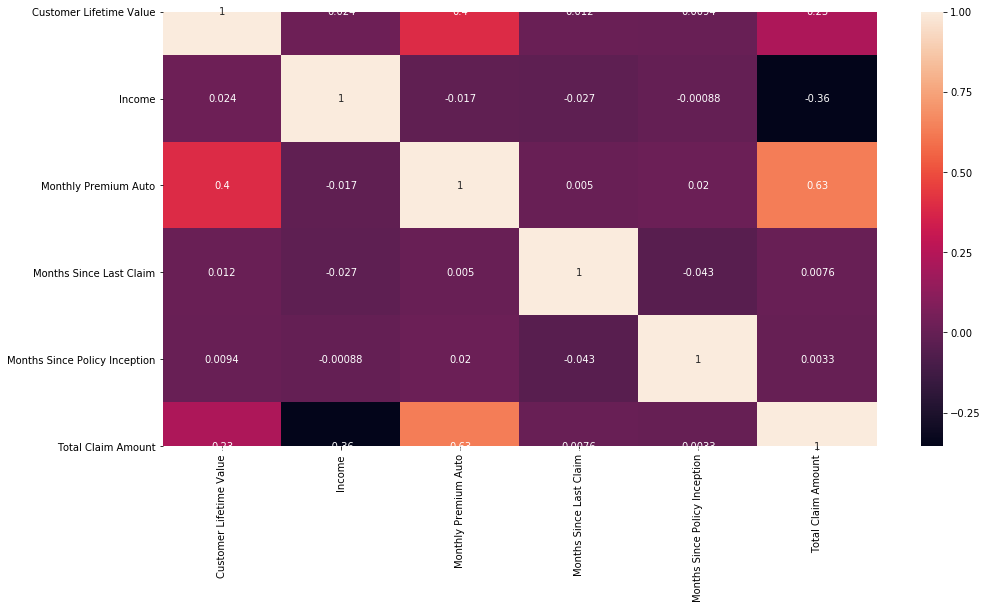

Observation:
1. From this plot we can see that there is no strong corelation between any of the columns.
2. Multicollinearity doesnt exists within the data set

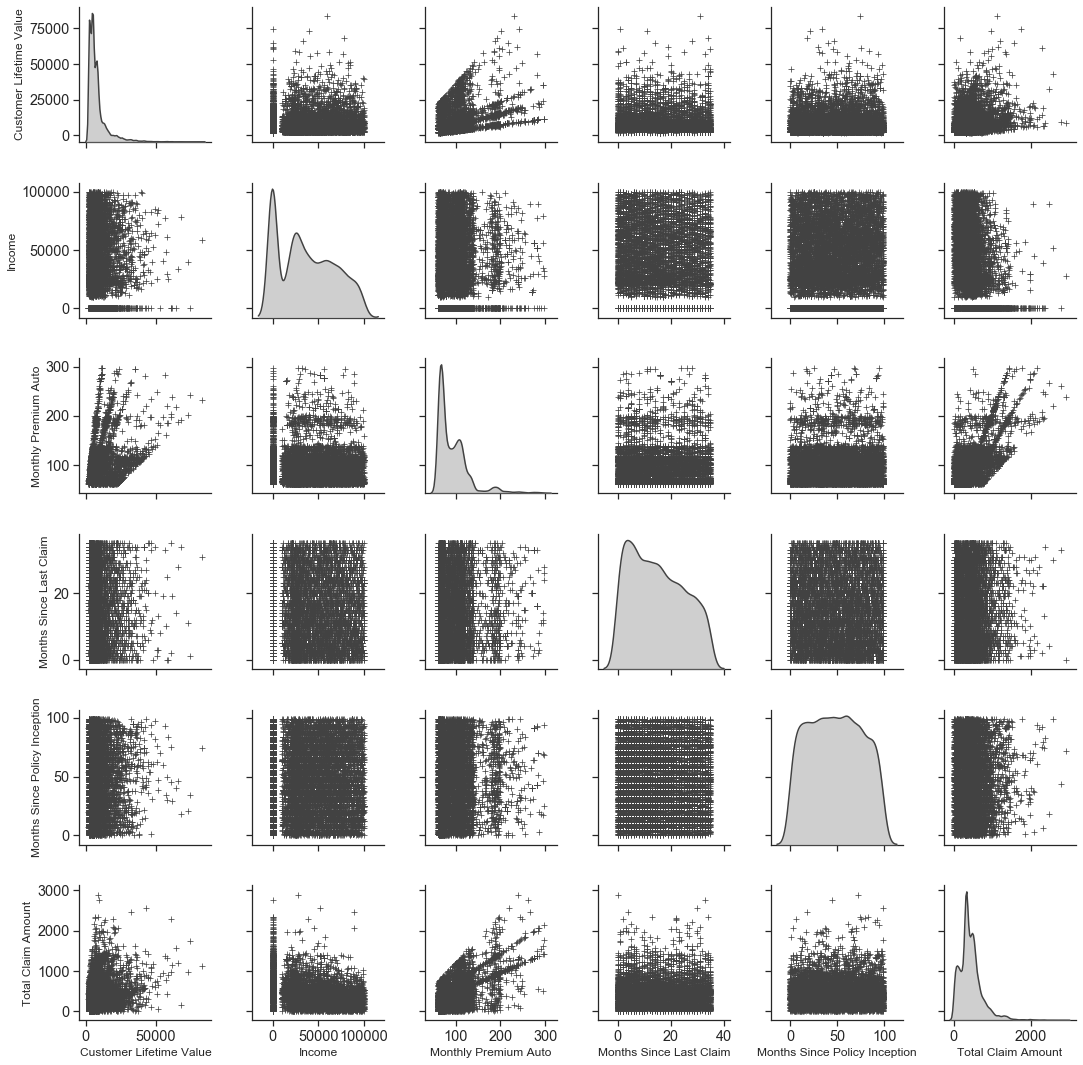

In [28]:
sns.pairplot(data[num_cols], diag_kind='kde', markers='+')
plt.show()a

Observation:
1. From the above pairplot , it observed that we dont have multiple Gaussian curves in our data.
2. It looks like the PCA method will not be applicable here, however to validate this we will perfrom the PCA and confirm after looking at the results.

#### 3A. Bivariate analysis of all numerical cols with the Target cols

In [29]:
rcParams['axes.prop_cycle'] = cycler(color=['#129845','#271254', '#FA4411', '#098765', '#000009'])

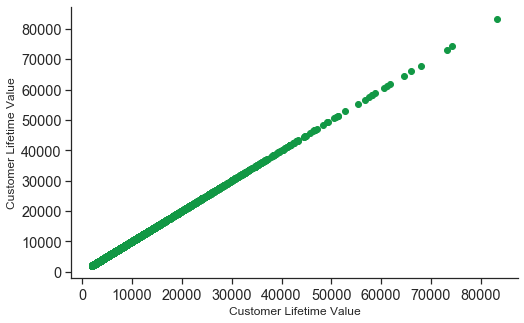

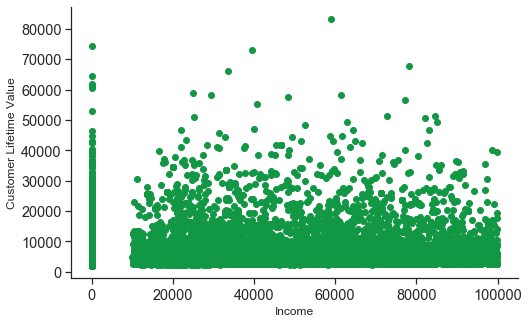

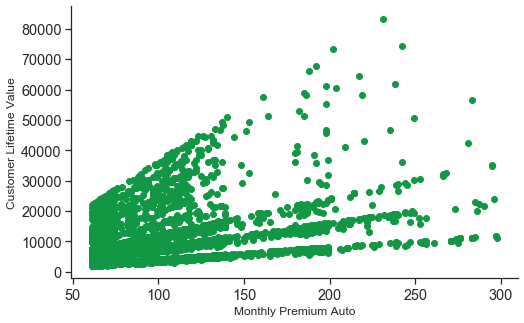

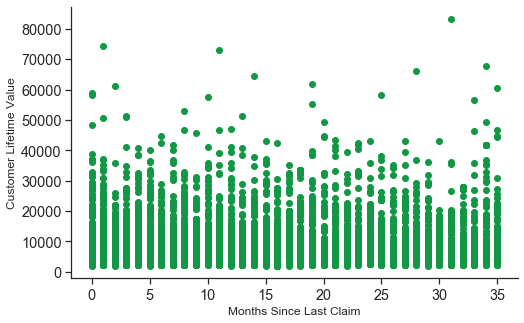

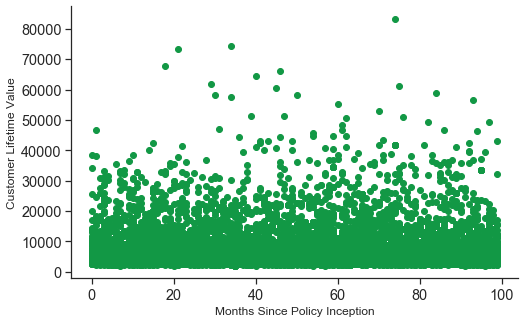

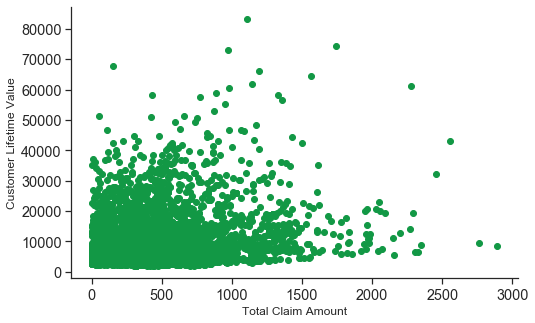

In [30]:
for feature in num_cols:
    
    plt.scatter(data[feature],data['Customer Lifetime Value'])
    plt.xlabel(feature)
    plt.ylabel('Customer Lifetime Value')
    plt.show()

#### 3B. Bivariate analysis of all category cols with the Target cols

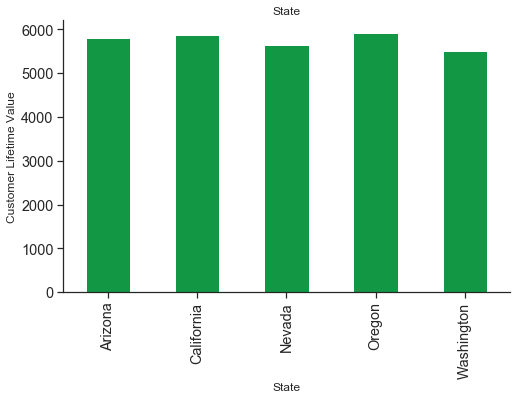

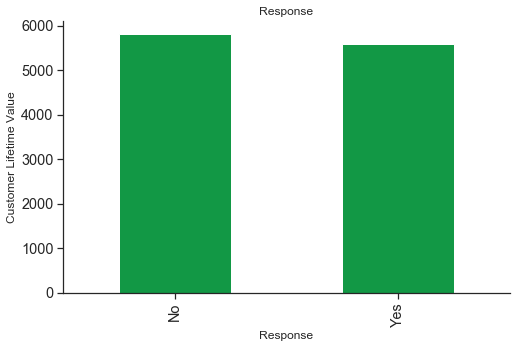

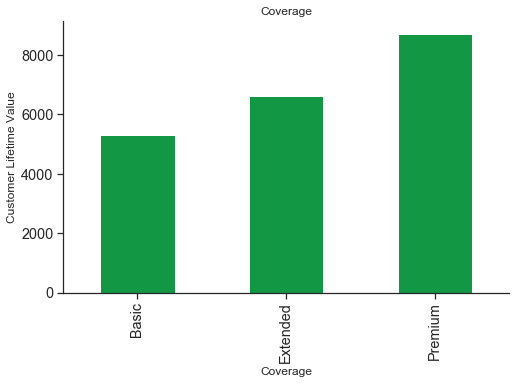

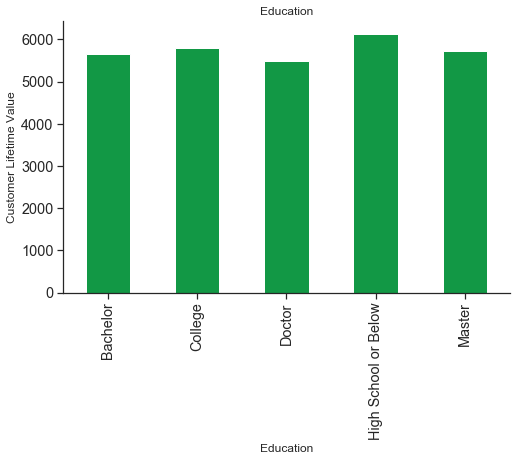

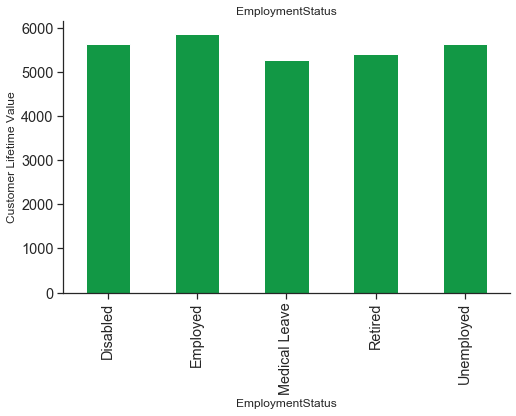

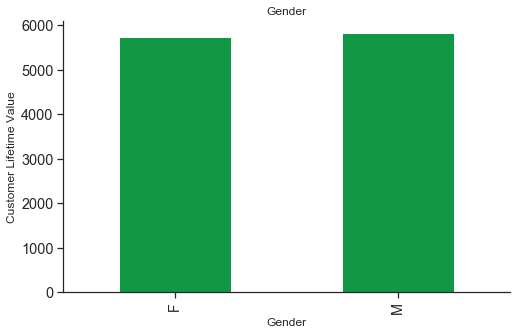

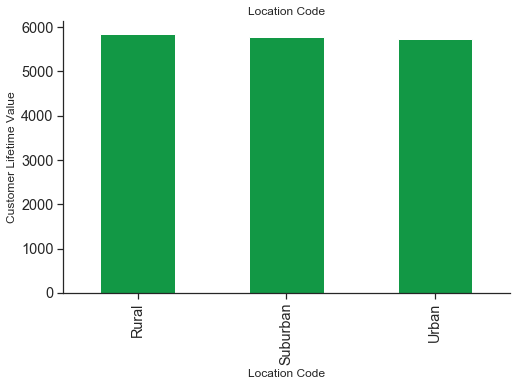

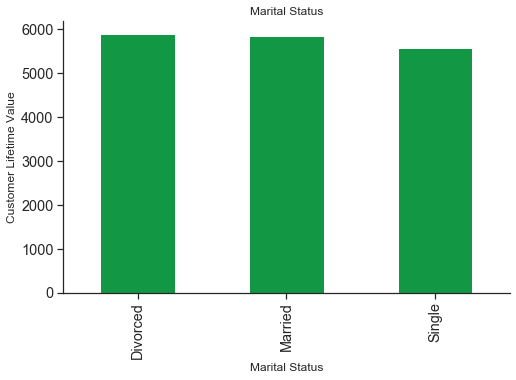

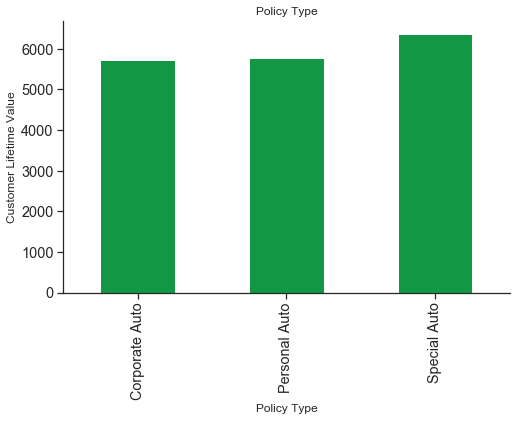

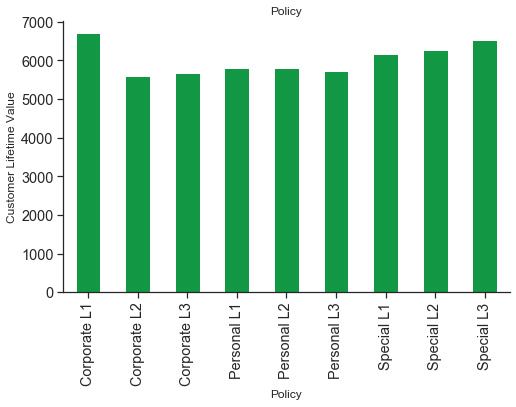

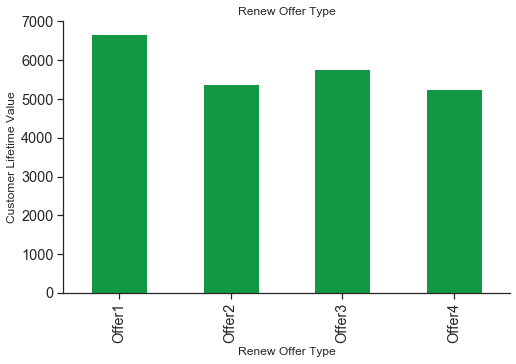

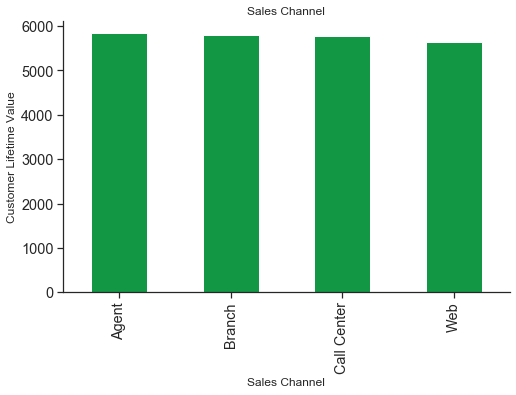

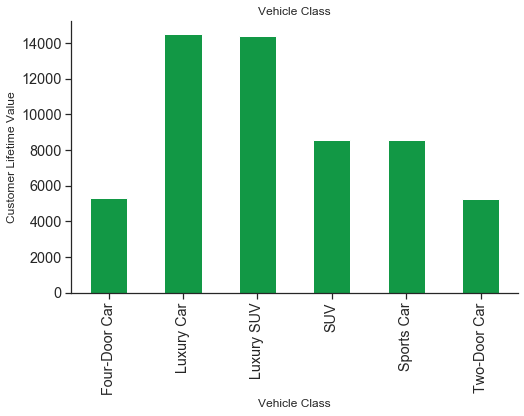

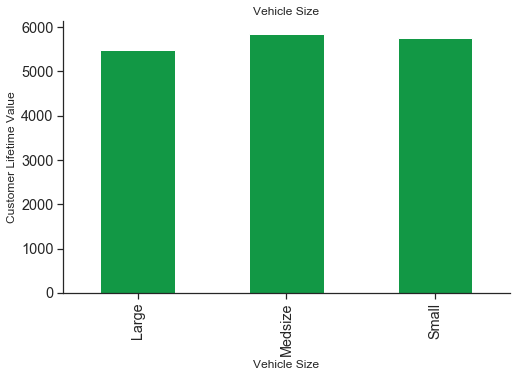

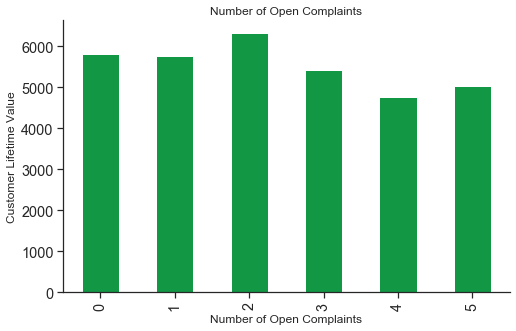

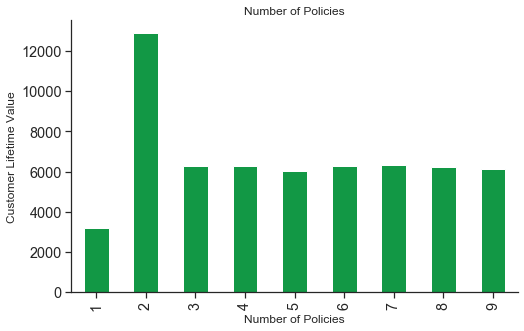

In [31]:
for feature in cat_cols:
    
    data.groupby(feature)['Customer Lifetime Value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Customer Lifetime Value')
    plt.title(feature)
    plt.show()

We have taken all the catergorical columns and have plotted a count plot again CLV to show the relation between the target variable.

1. Customers who have opted for premium coverage and owning Luxury cars in the Vehicle Class are generating more CLV 
2. Contribution of (Gender and Response of people) to CLV are  almost similar.
3. For renewal of the Policy , Offer 1 is pitched most of the times to the people 
4. Sales channnels are not impacting the CLV
5. Most of  the people  renewing policy for the 2nd time are generating ,more CLV

### 4. Identifying the Outliers

We already know that our data is highly right skewed, however, lets just ensure that these are just extreme values and  we dont have outliers.

Customer Lifetime Value


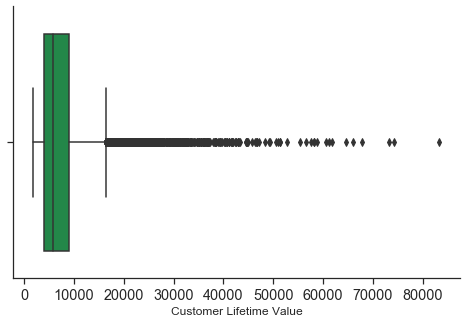

Income


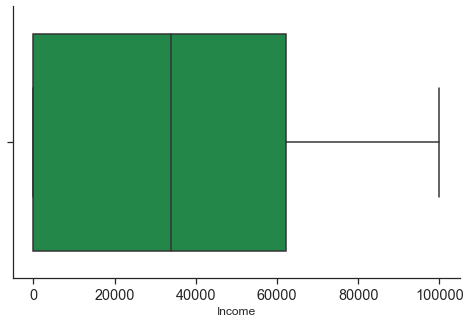

Monthly Premium Auto


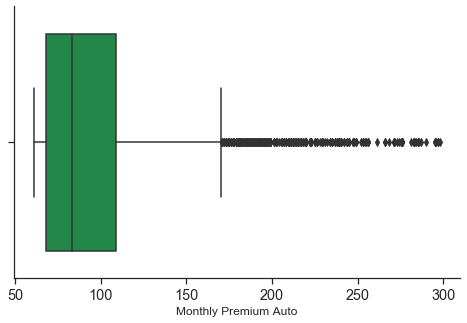

Months Since Last Claim


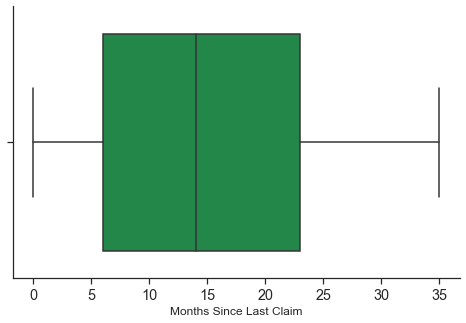

Months Since Policy Inception


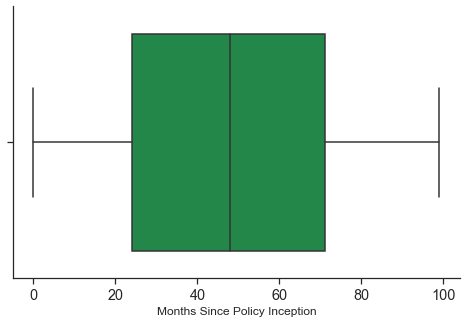

Total Claim Amount


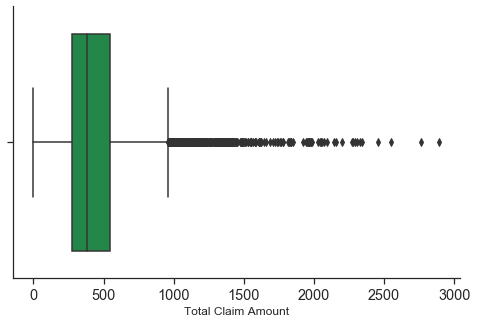

In [32]:
for i in num_cols:
    print(i)
    sns.boxplot(data[i])
    plt.show()

Observation:
1. We can see a lot of outliers in the target column whereas the interquartile range lies between 0 to 10000
2. From this plot we find that there are outliers in CLV, Monthly Premium Auto and Number of Policies. but we will not be treating them as an outlier, rather we will look into this later during the model building.

#### Outliers wrt to Target Column

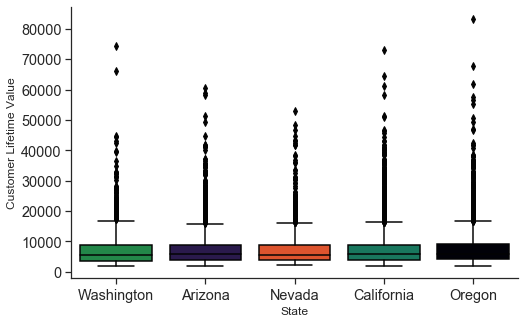

In [33]:
sns.boxplot(x='State',y='Customer Lifetime Value',data=data)
plt.show()

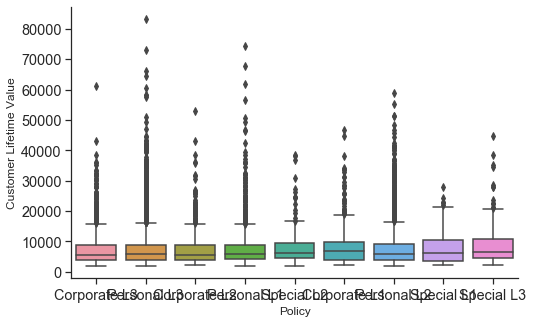

In [34]:
sns.boxplot(x='Policy',y='Customer Lifetime Value',data=data)
plt.show()

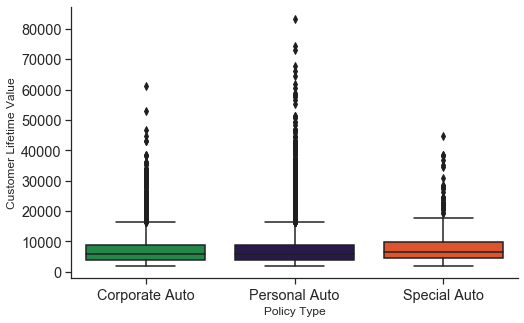

In [35]:
sns.boxplot(x='Policy Type',y='Customer Lifetime Value',data=data)
plt.show()

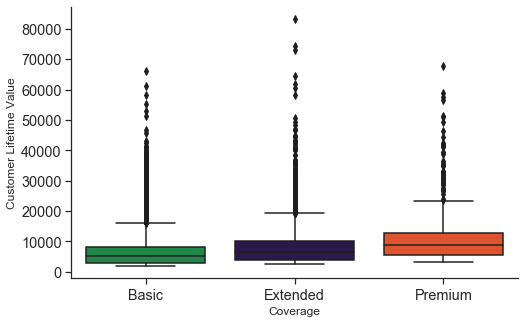

In [36]:
sns.boxplot(x='Coverage',y='Customer Lifetime Value',data=data)
plt.show()

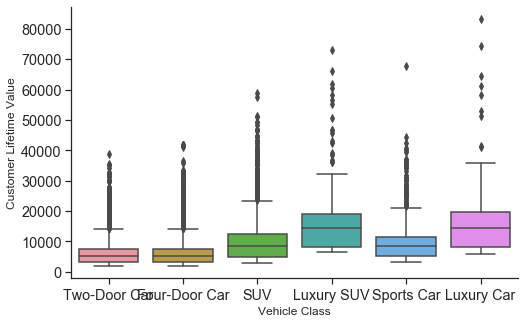

In [37]:
sns.boxplot(x='Vehicle Class',y='Customer Lifetime Value',data=data)
plt.show()

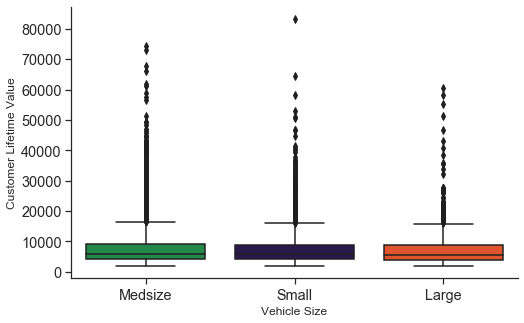

In [38]:
sns.boxplot(x='Vehicle Size',y='Customer Lifetime Value',data=data)
plt.show()

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

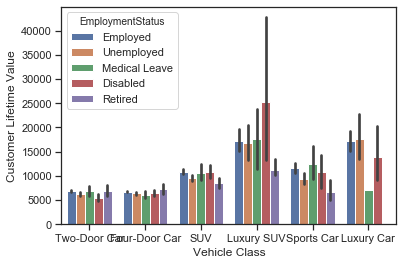

In [7]:
sns.barplot(data['Vehicle Class'],data['Customer Lifetime Value'],hue=data['EmploymentStatus'])
plt.show()

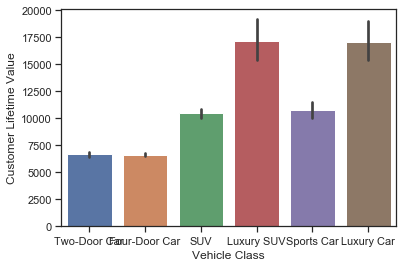

In [6]:
sns.barplot(data['Vehicle Class'],data['Customer Lifetime Value'])
plt.show()

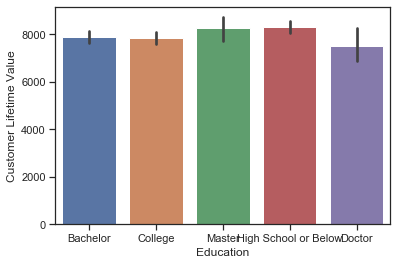

In [23]:
sns.barplot(data['Education'],data['Customer Lifetime Value'])
plt.show()

In [22]:
data.groupby(['Vehicle Class','EmploymentStatus'])['Customer Lifetime Value'].sum()

Vehicle Class  EmploymentStatus
Four-Door Car  Disabled            1.215565e+06
               Employed            1.961190e+07
               Medical Leave       1.405177e+06
               Retired             1.021044e+06
               Unemployed          7.391525e+06
Luxury Car     Disabled            1.240807e+05
               Employed            1.889754e+06
               Medical Leave       7.126597e+03
               Unemployed          7.587347e+05
Luxury SUV     Disabled            1.263928e+05
               Employed            2.019108e+06
               Medical Leave       1.576087e+05
               Retired             7.886871e+04
               Unemployed          7.686537e+05
SUV            Disabled            9.454452e+05
               Employed            1.174560e+07
               Medical Leave       8.644188e+05
               Retired             5.002720e+05
               Unemployed          4.700812e+06
Sports Car     Disabled            2.794251e+05
        

### Additional EDA to get insights from the dataset

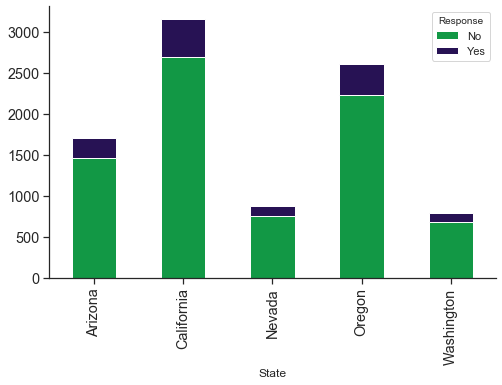

In [39]:
a=pd.crosstab(data['State'],data['Response'])
a.plot(kind='bar',stacked=True)
plt.show()

From different states we see that no.of 'no' response is far more than 'yes', California being the maximum.

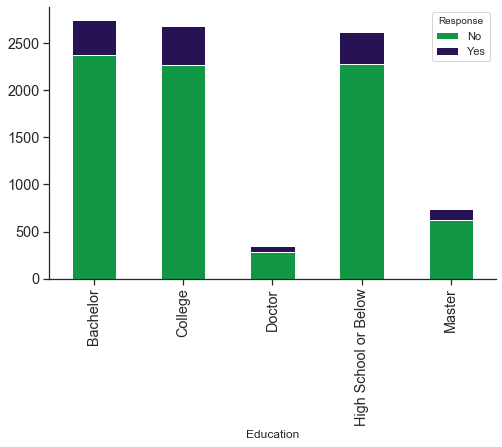

In [40]:
a=pd.crosstab(data['Education'],data['Response'])
a.plot(kind='bar',stacked=True)
plt.show()

In case of education, again we see that no.of 'no' response is far more than 'yes', in which bachelor and college is max.

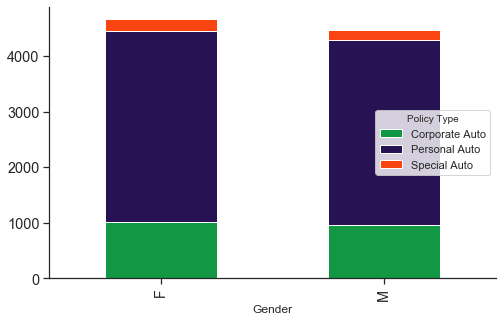

In [41]:
a=pd.crosstab(data['Gender'],data['Policy Type'])
a.plot(kind='bar',stacked=True)
plt.show()

When we compare policy type with Gender we find that max female and male are using Personal type policy followed by corporate auto

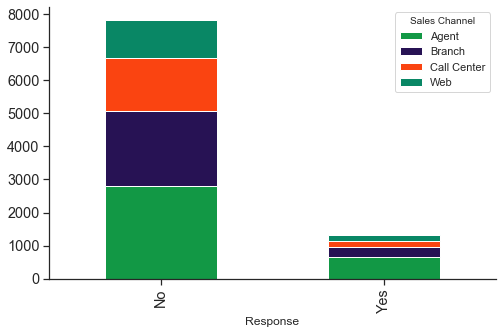

In [42]:
a=pd.crosstab(data['Response'],data['Sales Channel'])
a.plot(kind='bar',stacked=True)
plt.show()

If we see here we find that in response for yes or no, we get most of the response from the agents followed by branch, callcenter and web. Moreover the agents are selling the most of the policies.

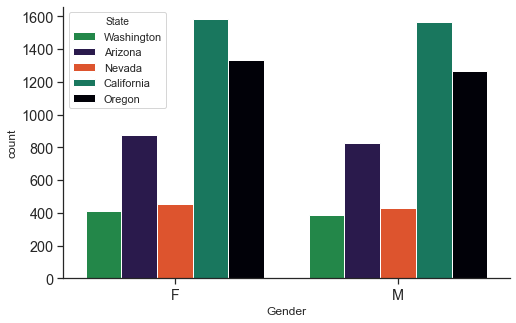

In [43]:
sns.countplot(data['Gender'], hue = data['State'])
plt.show()

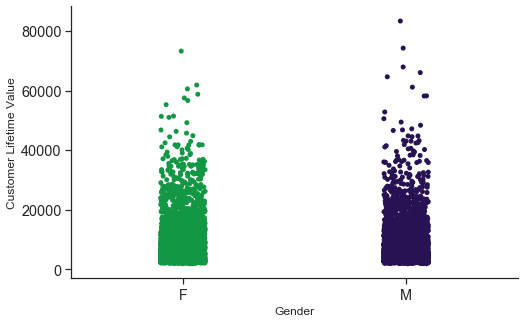

In [44]:
sns.stripplot(x='Gender',y='Customer Lifetime Value',data=data)
plt.show()

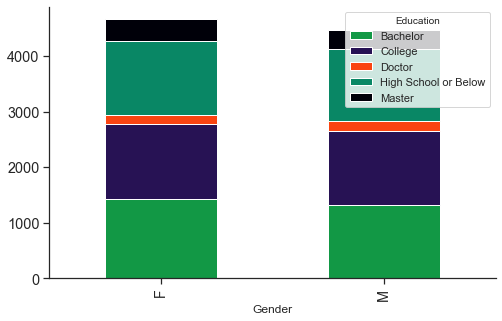

In [45]:
a = pd.crosstab(data['Gender'], data['Education'])
a.plot(kind = 'bar', stacked = True)
plt.show()

For better visualization we have proceeded to Tableau.

# Clustering

Clustering is a Machine Learning technique that involves the grouping of data points. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

Our data has a mix of both numerical and categorical data. We will now be looking at different types of Clustering techniques to find out the best cluster for our data.

We will start with scaling the numerical data using the scale method which is similar to zscore.

In [46]:
from sklearn.preprocessing import scale as scale
scaled_df = scale(data[num_cols])
scaled_df

array([[-0.76287773,  0.61282744, -0.70392465,  1.67809933, -1.54328695,
        -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, -0.2081864 , -0.21733419,
         2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581,  0.28820458, -0.36068043,
         0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, -0.60529919, -0.39651699,
         1.22793667],
       [-0.06993547, -0.51735647,  0.08082028,  1.87665573, -1.61496007,
         0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, -1.20096836,  1.50282075,
        -0.22200449]])

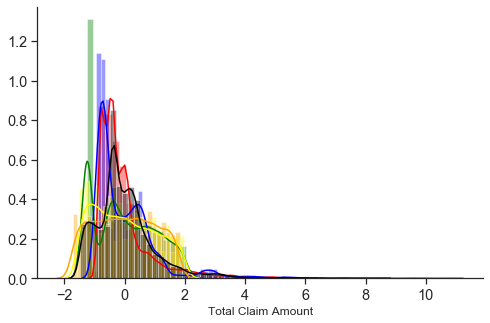

In [47]:
scaled_plot = pd.DataFrame(scaled_df, columns = num_cols)
scaled_plot.head()

sns.distplot(scaled_plot['Customer Lifetime Value'], color = 'red')
sns.distplot(scaled_plot['Income'], color = 'green')
sns.distplot(scaled_plot['Monthly Premium Auto'], color = 'blue')
sns.distplot(scaled_plot['Months Since Last Claim'], color = 'yellow')
sns.distplot(scaled_plot['Months Since Policy Inception'], color = 'orange')
sns.distplot(scaled_plot['Total Claim Amount'], color = 'black')
plt.show()

The data is scaled to a comparable level with the same distribution as before.
We will now form the clusters using k-means.

## k Means Cluster

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition 'n' observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.
K-Means is implicitly based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. That's why K-Means is for Euclidean distances only.

In [48]:
cluster_range = range(1,20)
cluster_wss = []

from sklearn.cluster import KMeans

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_wss.append(clusters.inertia_)

from collections import OrderedDict
cluster_df = pd.DataFrame(OrderedDict ({'num_clusters': cluster_range, 'cluster_wss': cluster_wss}))
cluster_df  

,num_clusters,cluster_wss
0,1,54804.000000
1,2,44468.933140
2,3,38058.032840
3,4,34045.797580
4,5,30698.031420
5,6,27898.113357
6,7,25891.663580
7,8,24267.994293
8,9,22895.638321
9,10,21936.307074


Looks like the wss score is dropping until the 5th cluster, post which the drop is becoming stagnant.
We will look at the scree plot as well to find the best set of clusters

##### Scree Plot

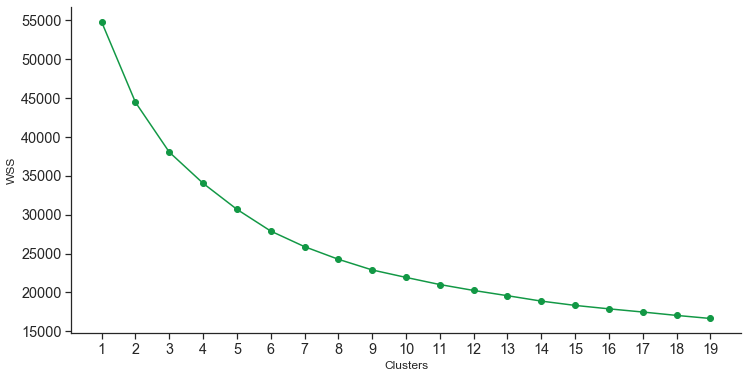

In [49]:
plt.figure(figsize = (12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(cluster_df.num_clusters), max(cluster_df.num_clusters)+1, 1.0))

plt.plot(cluster_df.num_clusters, cluster_df.cluster_wss, marker = 'o')
plt.show()

The scree plot shows that somewhere between 5-6 clusters can be formed using this data.
Before we apply the k-means clustering to the whole data set, lets us also validate the number of clusters using Silhoutte technique.

### Silhoutte Technique

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The Silhoutte coefficients are very close to 0 and hence the clusters formed using Silhoutte are very close to each other. It will difficult to identify them as they are not distinctly seperated.
Thus we conculde that we can proceed with K-means clustering as it is giving better results.

## Application of k-means Clustering

In [51]:
kcluster = KMeans(n_clusters = 2, random_state = 10)
kcluster

kcluster.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [52]:
data['Clusters'] = kcluster.predict(scaled_df)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Clusters
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1


We have now segregated our data into 2 clusters, lets group them cluster-wise to see what kind of features each cluster represents.


Note: Since K-means clustering is done using the numerical columns, we will group the numerical columns using median(given the extreme values in our data) and for teh categorical variables we will use modes.
The Categorical columns have not contributed in the forming of these clusters.

In [53]:
clus_profile_num = data[num_cols].groupby(data['Clusters']).median()

clus_profile_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
Clusters,,,,,,
0,10351.372650,18495,122,14,48,727.200000
1,5272.932008,39248,73,14,48,335.840529


In [54]:
clus_profile_cat = data[cat_cols].groupby(data['Clusters']).agg(pd.Series.mode)
clus_profile_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
Clusters,,,,,,,,,,,,,,,,
0,California,No,Extended,High School or Below,Unemployed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize,0,2
1,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,0,1


In [55]:
data['Clusters'].value_counts()

1    7149
0    1985
Name: Clusters, dtype: int64

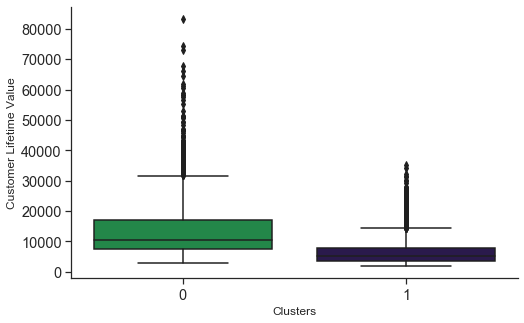

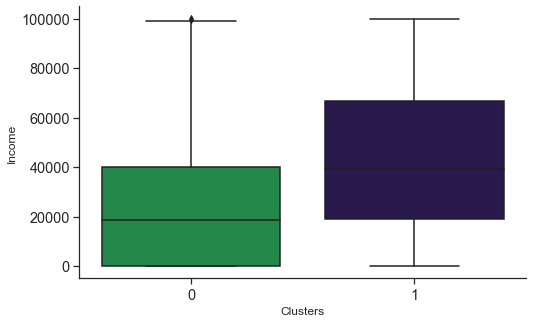

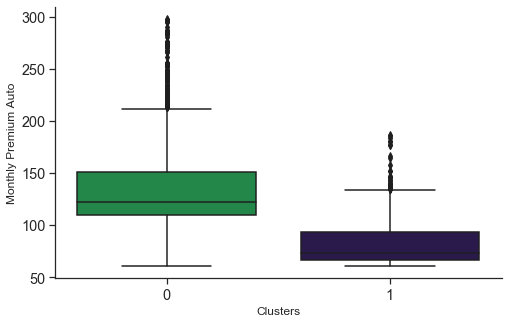

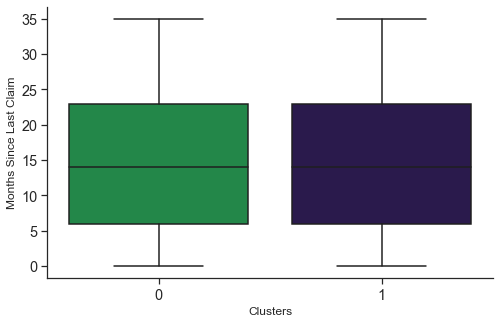

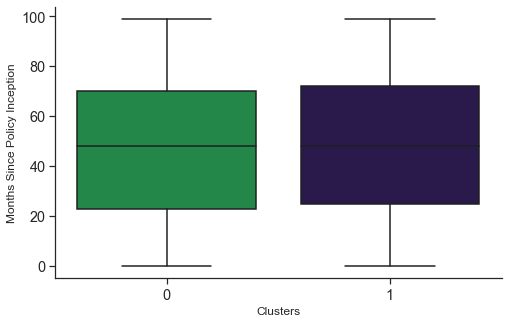

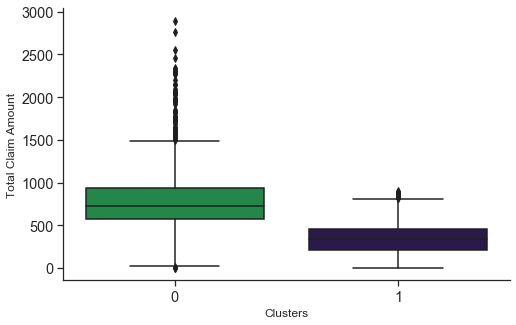

In [56]:
for i in num_cols:
    sns.boxplot(x = data['Clusters'], y = data[i])
    plt.xlabel('Clusters')
    plt.ylabel(i)
    plt.show()

Remarks:
1. Based on the Box plot analysis we can say that clusters are making singificant difference for features like Customer Lifetime value, Income, Monthly Premium Auto & total claim amount.
2. Clusters are not manking any changes for the features like months since policy inception & months since policy claim.
3. Total claim amount, monthly premium auto & Customer are completely distinct for both the clusters.
4. Income is slightly overlaping for both the clusters

    

Before we define our the clusters, let us also try to use the k-modes technique to find the best cluster using the categorical columns

## k Modes Cluster

k-modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between data points i.e modes. (This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)
In k-modes, it uses dissimilarities (that is, quantification of the total mismatches between two objects: the smaller this number, the more similar the two objects). And instead of means, it uses modes. A mode is a vector of elements that minimizes the dissimilarities between the vector itself and each object of the data. We will have as many modes as the number of clusters we required, since they act as centroids.

There are 3 types of K-mode techniques:
    1. Huang
    2. Random
    3. Cao

Huang is the most popular and appreciated method.

In [57]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=2, init='Huang', n_init=10, verbose=1) #Here we maintain the number of clusters as 5
#n_init : int, default: 10
#Number of time the k-modes algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of cost.

clusters = km.fit_predict(data[cat_cols])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1424, cost: 61694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2619, cost: 62769.0
Run 2, iteration: 2/100, moves: 43, cost: 62769.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2735, cost: 60990.0
Run 3, iteration: 2/100, moves: 904, cost: 60990.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2311, cost: 60774.0
Run 4, iteration: 2/100, moves: 1095, cost: 60774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2614, cost: 60915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2936, cost: 61469.0
Run 6, iteration: 2/100, moves: 1327, cost: 61469.0
Ini

In [58]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=2, init='random', n_init=10, verbose=1)

clusters = km.fit_predict(data[cat_cols])

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3729, cost: 61138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2938, cost: 60637.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2084, cost: 62927.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2885, cost: 62230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1432, cost: 62887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2278, cost: 61545.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 2505, cost: 60875.0
Run 7, iteration: 2/100, moves: 405, cost: 60875.0
Init: initializing centro

In [59]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=2, init='Cao', n_init=10, verbose=1)

clusters = km.fit_predict(data[cat_cols])

# Print the cluster centroids
print(km.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 604, cost: 62541.0
[['California' 'No' 'Basic' 'College' 'Employed' 'F' 'Suburban' 'Married'
  'Personal Auto' 'Personal L3' 'Offer1' 'Agent' 'Four-Door Car'
  'Medsize' '0' '1']
 ['Oregon' 'No' 'Extended' 'Bachelor' 'Unemployed' 'M' 'Suburban'
  'Single' 'Personal Auto' 'Personal L2' 'Offer2' 'Branch' 'SUV'
  'Medsize' '0' '2']]


We will try to interpret the results from the kmodes:

- Interations - The number of interation is modifications done to get to a perfect differential score. In some cases there is a single iteration, in some there are 2.
- Moves - this denotes the number of times the score was updated to recive the perfect differnential score.
- Cost - It denotes the estimated cost funtion associated with using the kmodes for model building. The lower the cost function the iteration is preferred.


Since k-modes is giving us results using only the categorical columns and there is no means to find the corresponding numerical columns associated with it.
Hence we will proceed with the results from k-means clustering

# Identifying the most significant variables for the model building.

## Parametric Test

A parametric test is a hypothesis testing procedure based on the assumption that observed data are distributed according to some distributions of well-known form (e.g., normal, Bernoulli, and so on) up to some unknown parameter(s) on which we want to make inference (say the mean, or the success probability).

### Assumption of Normality

As we have already established that the data is right skewed, we will now try to prove it statistically too.

H0: Numerical data follows normal distribution, in the form of a bell curve.

H1: Numerical data does not follows normal distribution

We will now do tha Shapiro test

In [60]:
for j in num_cols:
    print(j)
    print(stats.shapiro(data[j]), '\n')

Customer Lifetime Value
(0.7033728361129761, 0.0) 

Income
(0.9216511249542236, 0.0) 

Monthly Premium Auto
(0.7888578176498413, 0.0) 

Months Since Last Claim
(0.9501540064811707, 0.0) 

Months Since Policy Inception
(0.961362361907959, 7.707141553786494e-44) 

Total Claim Amount
(0.8883205056190491, 0.0) 



Since the pvalue of all the numerical columns is less than alpha - 0.05 hence we reject the null hypothesis. Which proves that the Data is not normal. hence we will not be able to apply any of the parametric tests on them.

#### Statistical tests to check the significance of the features

1. We have identified out target/ labeled variable as Customer Lifetime Value, we need to check remaining variables relation with the Target Variable.
2. This is essential to eliminate the non-significant features/variables from the the data to build the better machine learning model
3. As we decide which variables are imporatnt for model building, we will run statistical tests to check the significance of the features.
4. We will start with the categorical features first then we will finish the numerical variables.
5. By end of this analysis, we will come across the significant features for the machine learning model

In [61]:
# Check if we have included all the catogorical columns:
print(cat_cols)

# Lets start witht he categorical variables

['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']


#### Categorical Features 

###### Feature Name: State

Check the unique values of the feature & name of the feature for further calculations.

In [62]:
print('Feature Name: ' , cat_cols[0])
print('Unique Values of the feature: ' , data[cat_cols[0]].unique())

Feature Name:  State
Unique Values of the feature:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']


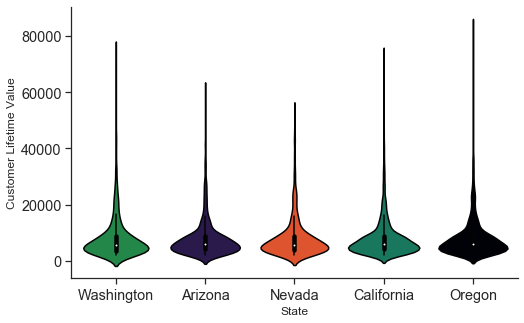

Count of the observations in every category: 
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


In [63]:
sns.violinplot(x = cat_cols[0] , y = 'Customer Lifetime Value' , data = data)
plt.show()


print('Count of the observations in every category: ')
print(data[cat_cols[0]].value_counts())


Based on the violin plot, we are not able to identify any significant difference in the data. We will perform One Way Avova test to confirm this.

Assumptions of the One Way Anova as follows
1. Independent observations - Checked
2. Normality: Data is not normal, hence we will go with the Kruskal-Wallis H-test for independent samples.
3. Homogeneity: As normality test has failed, we don't need to veryify this assumption as we will be going for a non parametric test

##### Hypothesis Testing for State Feature using Kruskal-Wallis Test:

Null Hypothesis: Mean Customer Lifetime Value is same across all the states.

Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the states.

In [64]:
data_state_Arizona = data[data[cat_cols[0]]=='Arizona']['Customer Lifetime Value']
data_state_California = data[data[cat_cols[0]]=='California']['Customer Lifetime Value']
data_state_Nevada = data[data[cat_cols[0]]=='Nevada']['Customer Lifetime Value']
data_state_Oregon = data[data[cat_cols[0]]=='Oregon']['Customer Lifetime Value']
data_state_Washington = data[data[cat_cols[0]]=='Washington']['Customer Lifetime Value']

kruskal(data_state_Arizona, data_state_California, data_state_Nevada, data_state_Oregon, data_state_Washington)

KruskalResult(statistic=5.07206958384011, pvalue=0.2799823235878242)

- As we can check p vlaues is more than 0.05, we failed to reject the null hypothesis.
- State feature is ot significant feature for our model.

Results:
1. Selected Feature is a categorical variable. To check the significance of the feature we have used Anova.
2. We have checked all the assumptions of the Anova. Since they failed, we used kruskal-wallis test.
3. Based on the Kruskal-Wallis  test we conclude that State Features is not much significant for the model.

Lets create a lists in which we will include the features which are passed in the test as Usable features

Another list will contain features which failed the test under not usable feature.

In [65]:
# Add State feature in not_usable_feature list
not_usable_features = []
not_usable_features.append(cat_cols[0])

##### Feature Name: Response

In [66]:
print('Feature Name: ' , cat_cols[1])
print('Unique Values of the feature: ' , data[cat_cols[1]].unique())

Feature Name:  Response
Unique Values of the feature:  ['No' 'Yes']


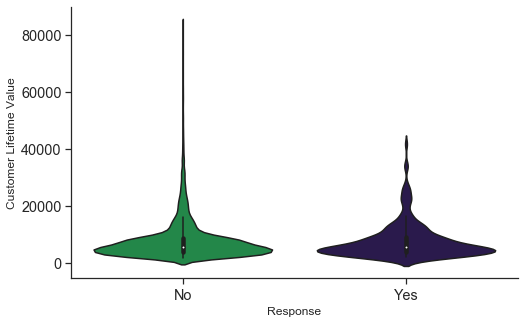

Count of the observations in every category: 
No     7826
Yes    1308
Name: Response, dtype: int64


In [67]:
sns.violinplot(x = cat_cols[1] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[1]].value_counts())


Violin plot shows different shape. We need to test the hypothesis for response.

Since there are only two categories, we will use independet t test for the same.

Assumptions of the independent t test as follows:
1. Independent Observations - Checked
2. Normality: Data is not normal hence we need to go ahead with the non parametric test.
3. Homogeneity: Since normality test is failed, we will not check this assumption.

Assumptions of Mann-Whitney U test Test:
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two  categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for State Feature using Mann-Whitney U test Test:

- Null Hypothesis : The distributions of Customer Lifetime Value is same for responses.
- Alternate Hypothesis : The distributions of Customer Lifetime Value is not same for responses.

In [68]:
data_Response_yes = data[data[cat_cols[1]]=='No']['Customer Lifetime Value']
data_Response_no = data[data[cat_cols[1]]=='Yes']['Customer Lifetime Value']

mannwhitneyu(data_Response_yes, data_Response_no)

MannwhitneyuResult(statistic=5060988.0, pvalue=0.2584436122645599)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Response feature is not significant for our model.

Results:
1. Selected Feature is a categorical variable. To check the significance of the feature we have used Independent t test.
2. We have checked all the assumptions of the t test. Since Normality test failed, we will go ahead with Mann-Whitney U test.
3. Based on the Mann-Whitney U test we conclude that Response Features is not much significant for the model.

In [69]:
# Add this feature to not_usable_feature list
not_usable_features.append(cat_cols[1])

###### Feature Name: Coverage 

In [70]:
print('Feature Name: ' , cat_cols[2])
print('Unique Values of the feature: ' , data[cat_cols[2]].unique())

Feature Name:  Coverage
Unique Values of the feature:  ['Basic' 'Extended' 'Premium']


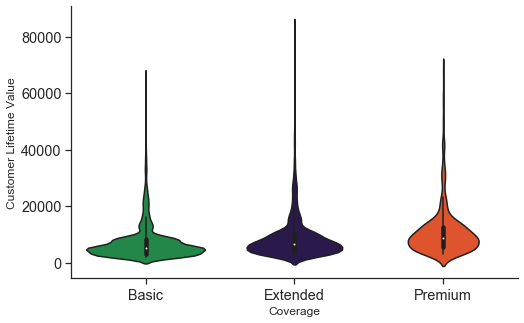

Count of the observations in every category: 
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


In [71]:
sns.violinplot(x = cat_cols[2] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[2]].value_counts())


- Violin plot shows different shape for all the three categories. We need to test the hypothesis for Coverage.
- Since there are three categories and out dependent feature is not normal we will go ahead with the Kruskal-Wallis Test

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Coverage Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Coverage types.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Coverage types.

In [72]:
data_Coverage_Basic = data[data[cat_cols[2]]=='Basic']['Customer Lifetime Value']
data_Coverage_Extended = data[data[cat_cols[2]]=='Extended']['Customer Lifetime Value']
data_Coverage_Premium = data[data[cat_cols[2]]=='Premium']['Customer Lifetime Value']

kruskal(data_Coverage_Basic, data_Coverage_Extended, data_Coverage_Premium)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

- As we can see the p value is less than 0.05, we reject the null hypothesis.
- We can conclude that feature 'Coverage' is significant for our model

Results:
1. Selected Feature is a categorical variable. Data is not normal hence we decided to use Kruskal-Wallis Test to check the significance of the feature.
2. We have checked all the assumptions of the Kruskal-Wallis Test.
3. Based on the Kruskal-Wallis Test we conclude that Coverage Features significant for the model.

In [73]:
# Create a list of usable features.
# Add Coverage feature to the usable feature list.
usable_features = []
usable_features.append(cat_cols[2])

###### Feature Name: Education

In [74]:
print('Feature Name: ' , cat_cols[3])
print('Unique Values of the feature: ' , data[cat_cols[3]].unique())

Feature Name:  Education
Unique Values of the feature:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


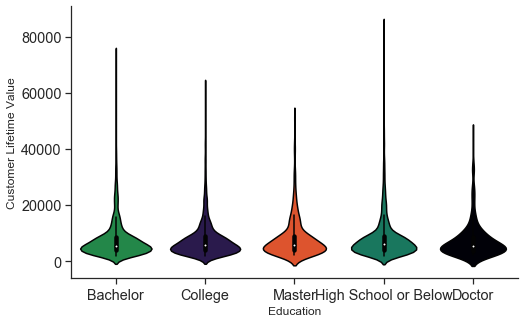

Count of the observations in every category: 
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


In [75]:
sns.violinplot(x = cat_cols[3] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[3]].value_counts())


- Violin plot shows distinct shapes for education feature. We need to test the hypothesis for Education.
- Since there are five categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Education Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Education types.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Education types

In [76]:
data_education_Bachelor = data[data[cat_cols[3]] == 'Bachelor']['Customer Lifetime Value']
data_education_College = data[data[cat_cols[3]] == 'College']['Customer Lifetime Value']
data_education_Master = data[data[cat_cols[3]] == 'Master']['Customer Lifetime Value']
data_education_High_School_Below = data[data[cat_cols[3]] == 'High School or Below']['Customer Lifetime Value']
data_education_Doctor = data[data[cat_cols[3]] == 'Doctor']['Customer Lifetime Value']

kruskal(data_education_Bachelor, data_education_College, data_education_Master, data_education_High_School_Below,
         data_education_Doctor)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- Education feature is significant for our model.

Results:
1. Education is a categorical variable & Customer Lifetime Value is numerical feature. To check the significance of the feature we decided to use non parametric test i.e. Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. Since all the assumptions are passed, we will perform Kruskal-Wallis Test.
3. Based on the Kruskal-Wallis Test we conclude that Education Features significant for the model.

In [77]:
# Lets add Education feature in the usable_feature list
usable_features.append(cat_cols[3])

###### Feature Name: Employment Status 

In [78]:
print('Feature Name: ' , cat_cols[4])
print('Unique Values of the feature: ' , data[cat_cols[4]].unique())

Feature Name:  EmploymentStatus
Unique Values of the feature:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']


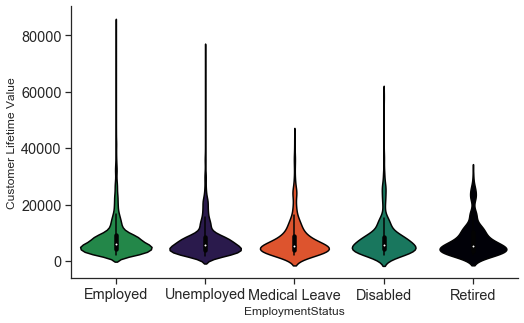

Count of the observations in every category: 
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


In [79]:
sns.violinplot(x = cat_cols[4] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[4]].value_counts())


- Violin plot shows little different shapes. We need to test the hypothesis for EmploymentStatus.
- Since there are five categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for EmploymentStatus Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the EmployementStatuses.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the EmployementStatuses.

In [80]:
data_EmploymentStatus_Employed = data[data[cat_cols[4]] == 'Employed']['Customer Lifetime Value']
data_EmploymentStatus_Unemployed = data[data[cat_cols[4]] == 'Unemployed']['Customer Lifetime Value']
data_EmploymentStatus_Medical_Leave = data[data[cat_cols[4]] == 'Medical Leave']['Customer Lifetime Value']
data_EmploymentStatus_Disabled = data[data[cat_cols[4]] == 'Disabled']['Customer Lifetime Value']
data_EmploymentStatus_Retired = data[data[cat_cols[4]] == 'Retired']['Customer Lifetime Value']

kruskal(data_EmploymentStatus_Employed, data_EmploymentStatus_Unemployed, data_EmploymentStatus_Medical_Leave, 
         data_EmploymentStatus_Disabled, data_EmploymentStatus_Retired)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- EmployeeStatus feature is significant for our model.

Results:
1. EmployeeStatus is a categorical variable & Customer Lifetime Value is numerical feature. To check the significance of the feature we decided to use non parametric test i.e. Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. Since all the assumptions are passed, we will perform Kruskal-Wallis Test.
3. Based on the Kruskal-Wallis Test we conclude that EmployeeStatus Features significant for the model.

In [81]:
# Add EmployeeStatus to the usable_feature list
usable_features.append(cat_cols[4])

###### Feature Name:  Gender 

In [82]:
# Sixth feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[5])
print('Unique Values of the feature: ' , data[cat_cols[5]].unique())

Feature Name:  Gender
Unique Values of the feature:  ['F' 'M']


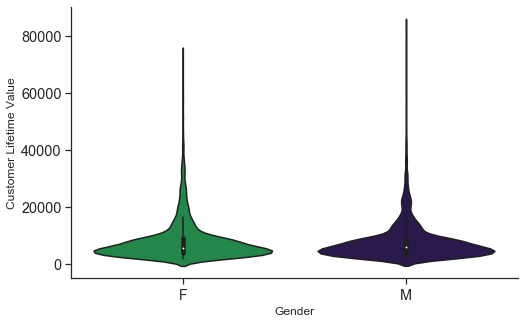

Count of the observations in every category: 
F    4658
M    4476
Name: Gender, dtype: int64


In [83]:
sns.violinplot(x = cat_cols[5] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[5]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Gender.
# Since there are only 2 categories & data is not normal, we will use Mann-Whitney U Test for the same.

Assumptions of Mann-Whitney U test Test:
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Gender Feature using Mann-Whitney U test Test:
- Null Hypothesis : The distributions of Customer Lifetime Value is same for Gender.
- Alternate Hypothesis : The distributions of Customer Lifetime Value is not same for Gender.

In [84]:
data_Gender_F = data[data[cat_cols[5]] == 'F']['Customer Lifetime Value']
data_Gender_M = data[data[cat_cols[5]] == 'M']['Customer Lifetime Value']

mannwhitneyu(data_Gender_F , data_Gender_M)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.24374651528224917)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Gender Feature is not significant for your model.

Results:
1. Gender is a categorical variable & Customer Lifetime Value is numerical feature. To check the significance of the feature we have used Mann-Whitney U Test.
2. We have checked all the assumptions of the Mann-Whitney U Test. all of them are checked.
3. Based on the Mann-Whitney U Test we conclude that Gender features is not much significant for the model.

In [85]:
# Add Gender feature into the not_usable_feature list
not_usable_features.append(cat_cols[5])

###### Feature Name:  Location Code

In [86]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[6])
print('Unique Values of the feature: ' , data[cat_cols[6]].unique())

Feature Name:  Location Code
Unique Values of the feature:  ['Suburban' 'Rural' 'Urban']


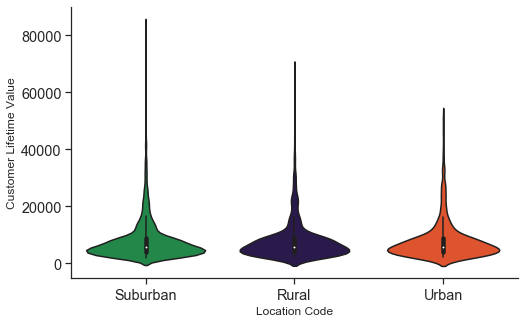

Count of the observations in every category: 
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64


In [87]:
sns.violinplot(x = cat_cols[6] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[6]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Location Code.
# Since there are three categories & Customer Lifetime Value is numeric, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Location Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Locations.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Locations.

In [88]:
data_Location_Suburban = data[data[cat_cols[6]] == 'Suburban']['Customer Lifetime Value']
data_Location_Rural = data[data[cat_cols[6]] == 'Rural']['Customer Lifetime Value']
data_Location_Urban = data[data[cat_cols[6]] == 'Urban']['Customer Lifetime Value']

kruskal(data_Location_Suburban, data_Location_Rural, data_Location_Urban)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Location feature is not significant for our model building.

Results:
1. Location is a categorical variable & Customer Lifetime Value is numerical. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of the Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Location Features is not much significant for the model.

In [89]:
# Add Location feature to not_usable_features
not_usable_features.append(cat_cols[6])

###### Feature Name:  Marital Status 

In [90]:
# Eighth feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[7])
print('Unique Values of the feature: ' , data[cat_cols[7]].unique())

Feature Name:  Marital Status
Unique Values of the feature:  ['Married' 'Single' 'Divorced']


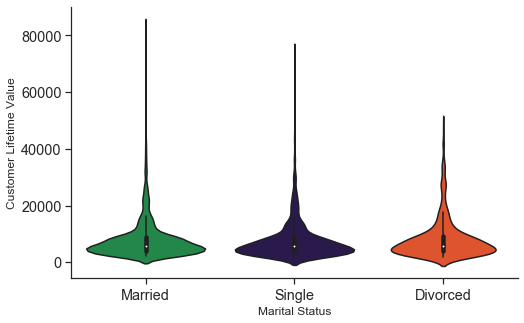

Count of the observations in every category: 
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64


In [91]:
sns.violinplot(x = cat_cols[7] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[7]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Marital Status.
# Since there are three categories & Customer Lifetime Value is numerical, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Marital Status Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Marital Status Type.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Marital Status Type.

In [92]:
data_Marital_Status_Married = data[data[cat_cols[7]] == 'Married']['Customer Lifetime Value']
data_Marital_Status_Single = data[data[cat_cols[7]] == 'Single']['Customer Lifetime Value']
data_Marital_Status_Divorced = data[data[cat_cols[7]] == 'Divorced']['Customer Lifetime Value']

kruskal(data_Marital_Status_Married, data_Marital_Status_Single, data_Marital_Status_Divorced)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- Mariatal Status feature is significant for our model building.

Results:
1. Marital Status is a categorical variable & Customer Lifetime Value is the numerical feature. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Marital Status Features is significant for the model.

In [93]:
# Add Marital Status to usable_features
usable_features.append(cat_cols[7])

###### Feature Name: Policy Type 

In [94]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[8])
print('Unique Values of the feature: ' , data[cat_cols[8]].unique())

Feature Name:  Policy Type
Unique Values of the feature:  ['Corporate Auto' 'Personal Auto' 'Special Auto']


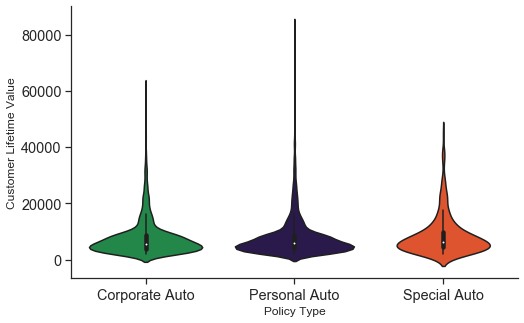

Count of the observations in every category: 
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64


In [95]:
sns.violinplot(x = cat_cols[8] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[8]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Policy Type.
# Since there are three categories & Customer Life time Value is numerical, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Policy Type Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Policy Type.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Policy Type.

In [96]:
data_Policy_Type_Corporate_Auto = data[data[cat_cols[8]] == 'Corporate Auto']['Customer Lifetime Value']
data_Policy_Type_Personal_Auto = data[data[cat_cols[8]] == 'Personal Auto']['Customer Lifetime Value']
data_Policy_Type_Special_Auto = data[data[cat_cols[8]] == 'Special Auto']['Customer Lifetime Value']

kruskal(data_Policy_Type_Corporate_Auto , data_Policy_Type_Personal_Auto , data_Policy_Type_Special_Auto)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Policy Type is not significant foe our model.

Results:
1. Policy Type is a categorical variable & Customer Lifetime Value is not normal. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Policy Type is not significant for the model.

In [97]:
# Add Policy Type feature in the not_usable_features
not_usable_features.append(cat_cols[8])

###### Feature Name: Policy

In [98]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[9])
print('Unique Values of the feature: ' , data[cat_cols[9]].unique())

Feature Name:  Policy
Unique Values of the feature:  ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']


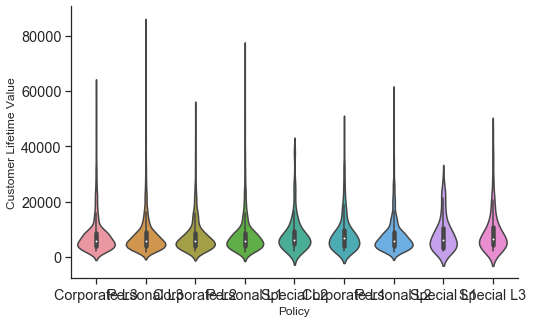

Count of the observations in every category: 
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


In [99]:
sns.violinplot(x = cat_cols[9] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[9]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Education.
# Since there are nine categories along with the Customer Lifetime Value as a Non Normal Data, we will use 
# Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Policy Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Policies.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Policies.

In [100]:
data_Policy_Corporate_L3 = data[data[cat_cols[9]] == 'Corporate L3']['Customer Lifetime Value']
data_Policy_Personal_L3 = data[data[cat_cols[9]] == 'Personal L3']['Customer Lifetime Value']
data_Policy_Corporate_L2 = data[data[cat_cols[9]] == 'Corporate L2']['Customer Lifetime Value']
data_Policy_Personal_L1 = data[data[cat_cols[9]] == 'Personal L1']['Customer Lifetime Value']
data_Policy_Special_L2 = data[data[cat_cols[9]] == 'Special L2']['Customer Lifetime Value']
data_Policy_Corporate_L1 = data[data[cat_cols[9]] == 'Corporate L1']['Customer Lifetime Value']
data_Policy_Personal_L2 = data[data[cat_cols[9]] == 'Personal L2']['Customer Lifetime Value']
data_Policy_Special_L1 = data[data[cat_cols[9]] == 'Special L1']['Customer Lifetime Value']
data_Policy_Special_L3 = data[data[cat_cols[9]] == 'Special L3']['Customer Lifetime Value']

kruskal(data_Policy_Corporate_L3, data_Policy_Personal_L3, data_Policy_Corporate_L2, data_Policy_Personal_L1, 
       data_Policy_Special_L2, data_Policy_Corporate_L1, data_Policy_Personal_L2, data_Policy_Special_L1, 
      data_Policy_Special_L3)

KruskalResult(statistic=7.94435188447338, pvalue=0.4389248352533279)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Policy feature is not significant for our model.

Results:
1. Policy Type is a categorical variable & Customer Lifetime Value is numeric, non normal feature. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Policy Type is not significant for the model.

In [101]:
# Add Policy feature into not_usable_feature list
not_usable_features.append(cat_cols[9])

###### Feature Name: Renew Offer Type

In [102]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[10])
print('Unique Values of the feature: ' , data[cat_cols[10]].unique())

Feature Name:  Renew Offer Type
Unique Values of the feature:  ['Offer1' 'Offer3' 'Offer2' 'Offer4']


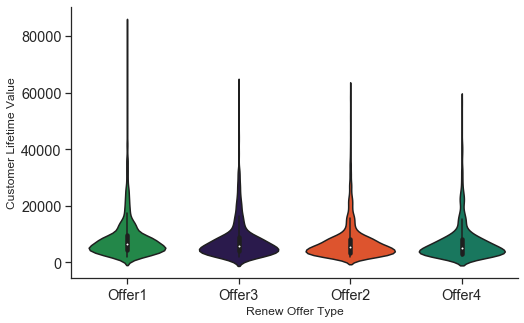

Count of the observations in every category: 
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64


In [103]:
sns.violinplot(x = cat_cols[10] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[10]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Renew Offer Type.
# Since there are Four categories & customer lifetime value is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Renew Offer Type Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Renew Offer Types.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Renew Offer Types.

In [104]:
data_Offer_Offer1 = data[data[cat_cols[10]] == 'Offer1']['Customer Lifetime Value']
data_Offer_Offer3 = data[data[cat_cols[10]] == 'Offer3']['Customer Lifetime Value']
data_Offer_Offer2 = data[data[cat_cols[10]] == 'Offer2']['Customer Lifetime Value']
data_Offer_Offer4 = data[data[cat_cols[10]] == 'Offer4']['Customer Lifetime Value']

kruskal(data_Offer_Offer1, data_Offer_Offer2, data_Offer_Offer2, data_Offer_Offer4)

KruskalResult(statistic=204.13845281089053, pvalue=5.381615996278631e-44)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- Renew Offer Type feature is significant for the model.

Results:
1. Renew Offer Type is a categorical variable & Customer Lifetime Value is numerical non normal data. To check the significance of the feature we decided to use Kruskal-Wallis Test.
2. We have checked all the assumptions of the Kruskal-Wallis Test. All passed.
3. Based on the Kruskal-Wallis Test we conclude that Renew Offer Type Features significant for the model.

In [105]:
# Add Renew Offer Type feature to usable_features list
usable_features.append(cat_cols[10])

###### Feature Name:  Sales Channel

In [106]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[11])
print('Unique Values of the feature: ' , data[cat_cols[11]].unique())

Feature Name:  Sales Channel
Unique Values of the feature:  ['Agent' 'Call Center' 'Web' 'Branch']


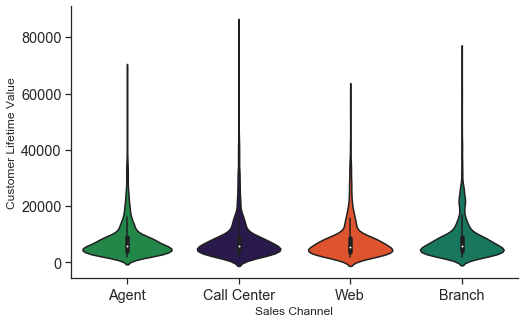

Count of the observations in every category: 
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64


In [107]:
sns.violinplot(x = cat_cols[11] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[11]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Sales Channels.
# Since there are four categories & Customer Lifetime Value is numerical non normal data, we will use Kruskal-Wallis 
# Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Sales Channel using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Sales Channels.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Sales Channels.

In [108]:
data_Sales_Agent = data[data[cat_cols[11]] == 'Agent']['Customer Lifetime Value']
data_Sales_Call_Center = data[data[cat_cols[11]] == 'Call Center']['Customer Lifetime Value']
data_Sales_Web = data[data[cat_cols[11]] == 'Web']['Customer Lifetime Value']
data_Sales_Branch = data[data[cat_cols[11]] == 'Branch']['Customer Lifetime Value']

kruskal(data_Sales_Agent , data_Sales_Call_Center , data_Sales_Web , data_Sales_Branch)

KruskalResult(statistic=4.491751501236969, pvalue=0.21302721572033925)

- As we can check p_value is more than 0.05, hence we failed to reject the null hypothesis.
- Sales channel is not significant for our model.

Results:
1. Sales Channel is a categorical variable & Customer Lifetime Value is numerical, non normal. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Sales Channel is not significant for the model.

In [109]:
# Add Sales Channel feature to the not_usable_feature list
not_usable_features.append(cat_cols[11])

###### Feature Name:  Vehicle Class

In [110]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[12])
print('Unique Values of the feature: ' , data[cat_cols[12]].unique())

Feature Name:  Vehicle Class
Unique Values of the feature:  ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


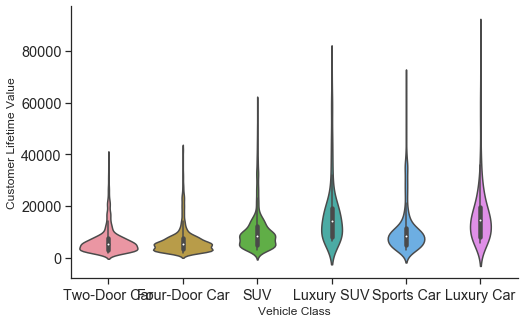

Count of the observations in every category: 
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64


In [111]:
sns.violinplot(x = cat_cols[12] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[12]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Vehicle Class.
# Since there are six categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Vehicle Class Feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Vehicle Class.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Vehicle Class.

In [112]:
data_Vehicle_Class_Two_Door_Car = data[data[cat_cols[12]] == 'Two-Door Car']['Customer Lifetime Value']
data_Vehicle_Class_Four_Door_Car = data[data[cat_cols[12]] == 'Four-Door Car']['Customer Lifetime Value']
data_Vehicle_Class_SUV = data[data[cat_cols[12]] == 'SUV']['Customer Lifetime Value']
data_Vehicle_Class_Luxury_SUV = data[data[cat_cols[12]] == 'Luxury SUV']['Customer Lifetime Value']
data_Vehicle_Class_Sports_Car = data[data[cat_cols[12]] == 'Sports Car']['Customer Lifetime Value']
data_Vehicle_Class_Luxury_Car = data[data[cat_cols[12]] == 'Luxury Car']['Customer Lifetime Value']

kruskal(data_Vehicle_Class_Two_Door_Car , data_Vehicle_Class_Four_Door_Car , data_Vehicle_Class_SUV , 
         data_Vehicle_Class_Luxury_SUV , data_Vehicle_Class_Sports_Car , data_Vehicle_Class_Luxury_Car)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)

- As we can check p_value is less than 0.05, hence we to reject the null hypothesis.
- Vehicle Class in significant for the mode.

Results:
1. Vehicle Class is a categorical variable & Customer Lifetime Value is numeric, non normal. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Vehicle Class is significant for the model.

In [113]:
# Add Vehicle Class to the usable_features list
usable_features.append(cat_cols[12])

###### Feature Name: Vehicle Size

In [114]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[13])
print('Unique Values of the feature: ' , data[cat_cols[13]].unique())

Feature Name:  Vehicle Size
Unique Values of the feature:  ['Medsize' 'Small' 'Large']


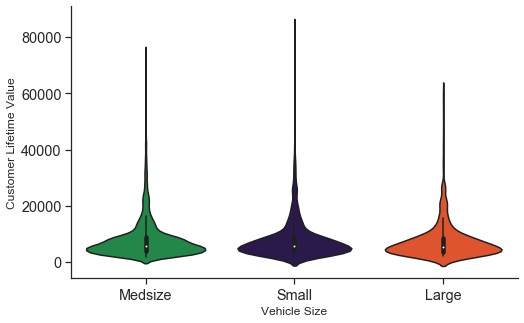

Count of the observations in every category: 
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64


In [115]:
sns.violinplot(x = cat_cols[13] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[13]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Education.
# Since there are three categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Vehicle Size feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the Vehicle Sizes.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Vehicle Sizes.

In [116]:
data_Vehicle_Size_Medsize = data[data[cat_cols[13]] == 'Medsize']['Customer Lifetime Value']
data_Vehicle_Size_Small = data[data[cat_cols[13]] == 'Small']['Customer Lifetime Value']
data_Vehicle_Size_Large = data[data[cat_cols[13]] == 'Large']['Customer Lifetime Value']

kruskal(data_Vehicle_Size_Medsize , data_Vehicle_Size_Small , data_Vehicle_Size_Large)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- Vehicle Class in significant for our model.

Results:
1. Vehicle Class is a categorical variable & Customer Lifetime Value is numeric as non normal. To check the significance of the feature we have used Kruskal-Wallis Test.
2. We have checked all the assumptions of Kruskal-Wallis Test. all of them are checked.
3. Based on the Kruskal-Wallis Test we conclude that Vehicle Class is significant for the model.

In [117]:
# Add Vehicle Class to the usable_features list 
usable_features.append(cat_cols[13])

###### Feature Name:  Number of Open Complaints

In [118]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[14])
print('Unique Values of the feature: ' , data[cat_cols[14]].unique())

Feature Name:  Number of Open Complaints
Unique Values of the feature:  [0 2 1 3 5 4]


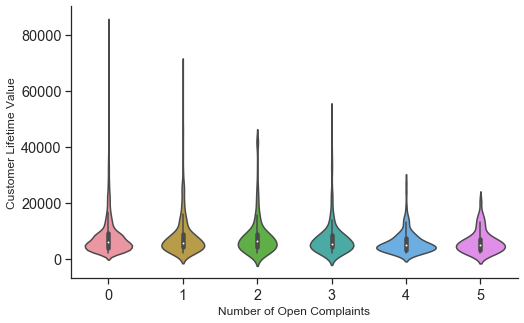

Count of the observations in every category: 
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


In [119]:
sns.violinplot(x = cat_cols[14] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[14]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Number of open complaints.
# Since there are six categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Number of Open Complaints feature using Kruskal-Wallis Test:
1. Null Hypothesis: Mean Customer Lifetime Value is same across all the Number of Open Complaints.
2. Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the Number of Open Complaints.

In [120]:
data_Complaints0 = data[data[cat_cols[14]] == 0]['Customer Lifetime Value']
data_Complaints1 = data[data[cat_cols[14]] == 1]['Customer Lifetime Value']
data_Complaints2 = data[data[cat_cols[14]] == 2]['Customer Lifetime Value']
data_Complaints3 = data[data[cat_cols[14]] == 3]['Customer Lifetime Value']
data_Complaints4 = data[data[cat_cols[14]] == 4]['Customer Lifetime Value']
data_Complaints5 = data[data[cat_cols[14]] == 5]['Customer Lifetime Value']

kruskal(data_Complaints0, data_Complaints1, data_Complaints2, data_Complaints3, data_Complaints4, data_Complaints5)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)

- As we can check p_value is less than 0.05, hence we reject the null hypothesis.
- Number of Open Complaints are significant for our model

Results:
1. Renew Offer Type is a categorical variable & Customer Lifetime Value is numerical, non normal data. To check the significance of the feature we decided to use Kruskal-Wallis Test.
2. We have checked all the assumptions of the Kruskal-Wallis Test. All assumptions are passed.
3. Based on the Kruskal-Wallis Test we conclude that Number of Open Complaints Feature is significant for the model.

In [121]:
# Add Open Number of Complaints to the usable_features list
usable_features.append(cat_cols[14])

#### Feature Name: Number of Policies

In [122]:
# Seventh feature will be as follow.
# Check the unique values of the feature & name of the feature for further calculations.
print('Feature Name: ' , cat_cols[15])
print('Unique Values of the feature: ' , data[cat_cols[15]].unique())

Feature Name:  Number of Policies
Unique Values of the feature:  [1 8 2 7 9 4 3 6 5]


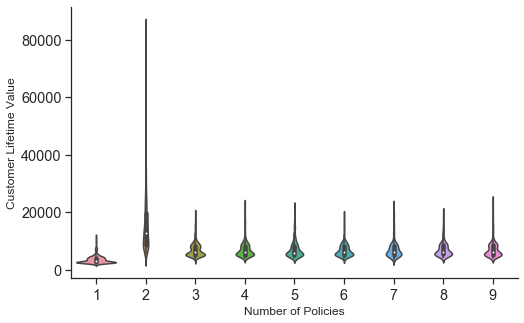

Count of the observations in every category: 
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


In [123]:
sns.violinplot(x = cat_cols[15] , y = 'Customer Lifetime Value' , data = data)
plt.show()

print('Count of the observations in every category: ')
print(data[cat_cols[15]].value_counts())

# Violin plot shows little different shapes. We need to test the hypothesis for Number of Policies.
# Since there are nine categories & data is not normal, we will use Kruskal-Wallis Test for the same.

Assumptions for Kruskal-Wallis Test.
1. Your dependent variable should be measured at the ordinal or continuous level - Checked
2. Your independent variable should consist of two or more categorical, independent groups. - Checked
3. You should have independence of observations - Checked

##### Hypothesis Testing for Number of Policies feature using Kruskal-Wallis Test:
- Null Hypothesis: Mean Customer Lifetime Value is same across all the number of policies.
- Alternate Hypthesis: Mean Customer Lifetime Value is not same for some of the number of policies.

In [125]:
data_No_of_Policies_1 = data[data[cat_cols[15]] == 1]['Customer Lifetime Value']
data_No_of_Policies_2 = data[data[cat_cols[15]] == 2]['Customer Lifetime Value']
data_No_of_Policies_3 = data[data[cat_cols[15]] == 3]['Customer Lifetime Value']
data_No_of_Policies_4 = data[data[cat_cols[15]] == 4]['Customer Lifetime Value']
data_No_of_Policies_5 = data[data[cat_cols[15]] == 5]['Customer Lifetime Value']
data_No_of_Policies_6 = data[data[cat_cols[15]] == 6]['Customer Lifetime Value']
data_No_of_Policies_7 = data[data[cat_cols[15]] == 7]['Customer Lifetime Value']
data_No_of_Policies_8 = data[data[cat_cols[15]] == 8]['Customer Lifetime Value']
data_No_of_Policies_9 = data[data[cat_cols[15]] == 9]['Customer Lifetime Value']

kruskal(data_No_of_Policies_1, data_No_of_Policies_2, data_No_of_Policies_3, data_No_of_Policies_4, data_No_of_Policies_5, 
      data_No_of_Policies_6, data_No_of_Policies_7, data_No_of_Policies_8, data_No_of_Policies_9)

KruskalResult(statistic=6572.858624784917, pvalue=0.0)

- As we can check p_value is less than 0.05, hence we  reject the null hypothesis.
- Number of Policies feature is significant to our model.

Results:
1. Number of Policies is a categorical variable & Customer Lifetime Values is numeric, non normal. To check the significance of the feature we decided to use Kruskal-Wallis Test.
2. We have checked all the assumptions of the Kruskal-Wallis Test. All the assumptions are passed.
3. Based on the Kruskal-Wallis Test we conclude that Number of Policies Feature is significant for the model.

In [126]:
# Add Number of Policies in the usable_features list
usable_features.append(cat_cols[15])

#### Numerical Features 

In [127]:
print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']


As we checked there no variable following the normal distribution.
Hence we will perform the levene test to check whether the variables have same variance or not

###### Income  vs Customer Lifetime Value 

In [128]:
# H0: Both groups have equal population variances
# H1: Both groups does have equal population variances

print('Feature Name: ' , num_cols[1])

levene(data[num_cols[1]] , data[num_cols[0]])

# Since p value is less than 0.05, we need to reject the null hypothesis
# We can say that there is enough statistical evidance to conside the variable for the model

Feature Name:  Income


LeveneResult(statistic=14561.788375652717, pvalue=0.0)

######  Monthly Premium Auto vs Customer Lifetime Value

In [129]:
# H0: Both groups have equal population variances
# H1: Both groups does have equal population variances

print('Feature Name: ' , num_cols[2])

levene(data[num_cols[2]] , data[num_cols[0]])

# Since p value is less than 0.05, we need to reject the null hypothesis
# We can say that there is enough statistical evidance to conside the variable for the model

Feature Name:  Monthly Premium Auto


LeveneResult(statistic=4216.358073406346, pvalue=0.0)

######  Months Since Last Claim vs Customer Lifetime Value

In [130]:
# H0: Both groups have equal population variances
# H1: Both groups does have equal population variances

print('Feature Name: ' , num_cols[3])

levene(data[num_cols[3]] , data[num_cols[0]])

# Since p value is less than 0.05, we need to reject the null hypothesis
# We can say that there is enough statistical evidance to conside the variable for the model

Feature Name:  Months Since Last Claim


LeveneResult(statistic=4248.982669080376, pvalue=0.0)

######  Months Since Policy Inception vs Customer Lifetime Value

In [131]:
# H0: Both groups have equal population variances
# H1: Both groups does have equal population variances

print('Feature Name: ' , num_cols[4])

levene(data[num_cols[4]] , data[num_cols[0]])

# Since p value is less than 0.05, we need to reject the null hypothesis
# We can say that there is enough statistical evidance to conside the variable for the model

Feature Name:  Months Since Policy Inception


LeveneResult(statistic=4216.887393743943, pvalue=0.0)

###### Total Claim Amount vs Customer Lifetime Value

In [132]:
# H0: Both groups have equal population variances
# H1: Both groups does have equal population variances

print('Feature Name: ' , num_cols[5])

levene(data[num_cols[5]] , data[num_cols[0]])

# Since p value is less than 0.05, we need to reject the null hypothesis
# We can say that there is enough statistical evidance to conside the variable for the model

Feature Name:  Total Claim Amount


LeveneResult(statistic=3844.596676341633, pvalue=0.0)

In [133]:
# Lets add all the numerical features we will be using in the model
for i in num_cols[1:]:
    usable_features.append(i)

In [134]:
print('Features we can use: ' , usable_features)
print('\n')
print('Features we can avoid using: ' , not_usable_features)

Features we can use:  ['Coverage', 'Education', 'EmploymentStatus', 'Marital Status', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']


Features we can avoid using:  ['State', 'Response', 'Gender', 'Location Code', 'Policy Type', 'Policy', 'Sales Channel']


As mentioned earlier, we will perform the PCA to confirm if its needed for our data. We will statistically validate this now:

### Principle Component Analysis 

In [135]:
# Create a database with only numerical values as principle compomnent analysis works only on numerical dataset.

pca_data = data[num_cols]
pca_data.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [136]:
x_std = StandardScaler().fit_transform(pca_data)
x_std
# Scale the data using StandardScaler

array([[-0.76287773,  0.61282744, -0.70392465,  1.67809933, -1.54328695,
        -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, -0.2081864 , -0.21733419,
         2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581,  0.28820458, -0.36068043,
         0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, -0.60529919, -0.39651699,
         1.22793667],
       [-0.06993547, -0.51735647,  0.08082028,  1.87665573, -1.61496007,
         0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, -1.20096836,  1.50282075,
        -0.22200449]])

In [137]:
x_std = StandardScaler().fit_transform(pca_data)
Apca = PCA()
pca.fit(x_std)
# Fit PCA on the scaled data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [138]:
x_std = StandardScaler().fit_transform(pca_data)
Apca = PCA()
pca.fit(x_std)
# Fit PCA on the scaled data
pca.explained_variance_.round(2)
# Explained variance

array([1.91, 1.12, 1.04, 0.96, 0.7 , 0.27])

In [139]:

pc_score = pca.transform(x_std)
pc_score.round(2)

array([[-1.  , -0.5 ,  2.2 ,  0.1 , -0.62, -0.42],
       [ 1.74, -1.59, -0.35, -0.44, -0.29, -1.2 ],
       [ 0.75,  0.52,  0.59, -0.05,  0.06, -0.23],
       ...,
       [ 0.91, -1.25, -0.41, -0.78,  0.32, -0.59],
       [ 0.7 , -1.17,  2.26,  0.14, -0.22, -0.37],
       [-0.45, -1.  , -2.17,  0.18,  0.26,  0.32]])

In [140]:

exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100 , decimals = 1)
exp_var
# Explained variance in the percentage 

array([31.9, 18.7, 17.3, 15.9, 11.6,  4.5])

In [141]:

np.cumsum(exp_var)
# Cumulative explained variance

array([31.9, 50.6, 67.9, 83.8, 95.4, 99.9])

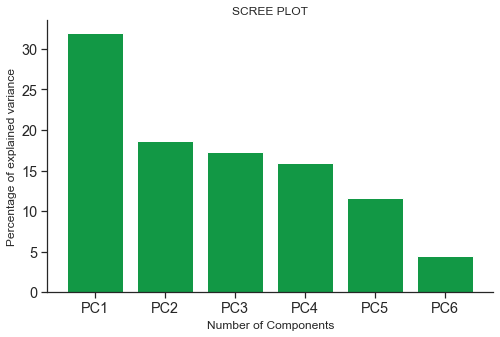

In [142]:

labels = ['PC' + str(x) for x in range(1 , len(exp_var) + 1)]
plt.bar(x = range(1 , len(exp_var)+1) , height = exp_var, tick_label = labels)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of explained variance')
plt.title('SCREE PLOT')
plt.show()

# Scree plot to  identify the the optimum principle components

Based on the principle components, we can conclude that for this analysis, we can not use principle component analysis.

Below are the reason.
1. PCA should help us to reduce the dimentions.
2. All the principle components are taking equal part hence we can not use this method.

In [143]:
# Lets create a database with only usable features.
data1 = data.drop(['State', 'Response', 'Gender', 'Location Code', 'Policy Type', 'Policy', 'Sales Channel', 'Customer',
                   'Effective To Date', 'Clusters'] , axis = 1)
data1.head()

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Size
0,2763.519279,Basic,Bachelor,Employed,56274,Married,69,32,5,0,1,Offer1,384.811147,Two-Door Car,Medsize
1,6979.535903,Extended,Bachelor,Unemployed,0,Single,94,13,42,0,8,Offer3,1131.464935,Four-Door Car,Medsize
2,12887.431650,Premium,Bachelor,Employed,48767,Married,108,18,38,0,2,Offer1,566.472247,Two-Door Car,Medsize
3,7645.861827,Basic,Bachelor,Unemployed,0,Married,106,18,65,0,7,Offer1,529.881344,SUV,Medsize
4,2813.692575,Basic,Bachelor,Employed,43836,Single,73,12,44,0,1,Offer1,138.130879,Four-Door Car,Medsize


Replacing the values in categorical columns with relevant ordinal numerical values

In [144]:
data1['Coverage'].replace({'Basic':0 , 'Extended':1 , 'Premium':2} , inplace = True)
data1['Education'].replace({'Doctor':0 , 'College':1 , 'Bachelor':2, 'Master':3 , 'High School or Below':4}
                           , inplace = True)
data1['EmploymentStatus'].replace({'Retired':0 , 'Unemployed':1 , 'Medical Leave':2, 'Disabled':3 , 'Employed':4}
                           , inplace = True)
data1['Marital Status'].replace({'Married':0 , 'Single':1 , 'Divorced':2}, inplace = True)
data1['Renew Offer Type'].replace({'Offer4':0 , 'Offer2':1 , 'Offer3':2 , 'Offer1':3}, inplace = True)
data1['Vehicle Class'].replace({'Four-Door Car':0 , 'Two-Door Car':1 , 'SUV':2 , 'Sports Car':3 , 'Luxury Car':4,
                                'Luxury SUV':5}, inplace = True)
data1['Vehicle Size'].replace({'Medsize':1, 'Small':2, 'Large':0}, inplace=True)

In [145]:
data1.head().T

,0,1,2,3,4
Customer Lifetime Value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
Coverage,0.000000,1.000000,2.000000,0.000000,0.000000
Education,2.000000,2.000000,2.000000,2.000000,2.000000
EmploymentStatus,4.000000,1.000000,4.000000,1.000000,4.000000
Income,56274.000000,0.000000,48767.000000,0.000000,43836.000000
Marital Status,0.000000,1.000000,0.000000,0.000000,1.000000
Monthly Premium Auto,69.000000,94.000000,108.000000,106.000000,73.000000
Months Since Last Claim,32.000000,13.000000,18.000000,18.000000,12.000000
Months Since Policy Inception,5.000000,42.000000,38.000000,65.000000,44.000000
Number of Open Complaints,0.000000,0.000000,0.000000,0.000000,0.000000


Now that we have our final columns for model building, before proceeding we will treat the skewness in the numerical columns.

## Treating the skewness in the data

In [146]:
data[num_cols].skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Total Claim Amount               1.714966
dtype: float64

When we look at the skewness scores, we know for sure that we have to treat the following columns which show high positive skewness (scores above 1):

1. Customer Lifetime Value (which is our Target columns as well)
2. Monthly Premium Auto
3. Total Claim Amount

### However, let us first answer why do we need to treat skewness?
Skewness transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. Normality is an important assumption for many statistical techniques; if your data isn’t normal, skewness treatment is recommended. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively. In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model. Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction. Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

Creating a duplicate data sent to add the transformations

In [147]:
df = data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Clusters
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1


### Log Transformation
The log transformation can be used to make highly skewed distributions less skewed. The comparison of the means of log-transformed data is actually a comparison of geometric means.

##### Customer Lifetime Value

In [148]:
df['Customer Lifetime Value_log'] = np.log(df['Customer Lifetime Value'])
print('Before log transformation ', data['Customer Lifetime Value'].skew())
print('After log transformation ', df['Customer Lifetime Value_log'].skew())

Before log transformation  3.032280259929985
After log transformation  0.5759407149025203


And just like that, we’ve gone from the skew coefficient of 3.03 to 0.57. But before jumping to conclusions we should also make a quick visualization:

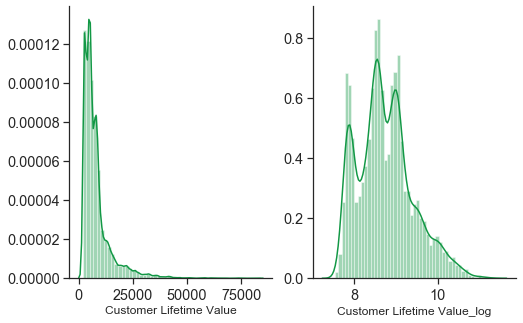

In [149]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Customer Lifetime Value'], ax = axes[0])
sns.distplot(df['Customer Lifetime Value_log'], ax = axes[1])
plt.show()

Well, it’s not normally distributed for sure, but is a lot better than what we had before. However the graphy now shows clear trimodal distribution We will also try Square root transformation.

##### Monthly Premium Auto

In [150]:
df['Monthly Premium Auto_log'] = np.log(df['Monthly Premium Auto'])
print('Before log transformation ', data['Monthly Premium Auto'].skew())
print('After log transformation ', df['Monthly Premium Auto_log'].skew())

Before log transformation  2.1235464499475345
After log transformation  1.0061541301663262


The skewness has dropped by 1.1, lets have a look at the visualization

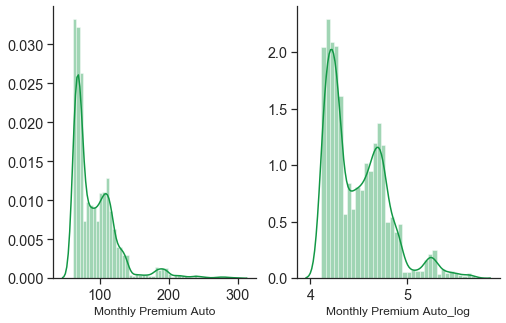

In [151]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Monthly Premium Auto'], ax = axes[0])
sns.distplot(df['Monthly Premium Auto_log'], ax = axes[1])
plt.show()

The trimodal distribution is definitely more evident after log transformation.

##### Total Claim Amount

In [152]:
df['Total Claim Amount_log'] = np.log(df['Total Claim Amount'])
print('Before log transformation ', data['Total Claim Amount'].skew())
print('After log transformation ', df['Total Claim Amount_log'].skew())

Before log transformation  1.7149658097209557
After log transformation  -1.9200328840780618


Here the log transformation has made a positively skewed data to a sihnificant negatively skewed data. Looking at the visualization will give us more clarity on this,

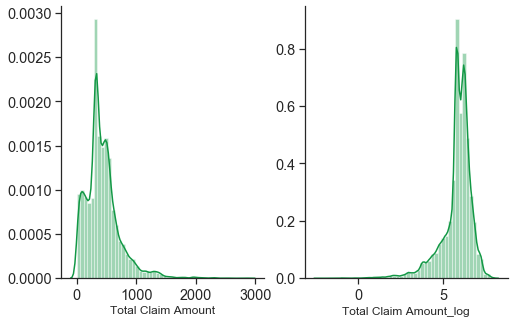

In [153]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Total Claim Amount'], ax = axes[0])
sns.distplot(df['Total Claim Amount_log'], ax = axes[1])
plt.show()

The data has definitely become negatively skewed which is not feasible. Hence we cannot proceed with log transformations for Total Claim Amount.

### Square Root Transformation
Square root transformation is one of the many types of standard transformations. Each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.

In [154]:
df['Customer Lifetime Value_sqrt'] = np.sqrt(df['Customer Lifetime Value'])
print('Before sqrt transformation ', data['Customer Lifetime Value'].skew())
print('After sqrt transformation ', df['Customer Lifetime Value_sqrt'].skew())

Before sqrt transformation  3.032280259929985
After sqrt transformation  1.5888516849482026


The skew coefficient went from 3.03 to 1.5, which still is a notable difference. However, the log transformation ended with better results. Nevertheless, let’s visualize how everything looks now:

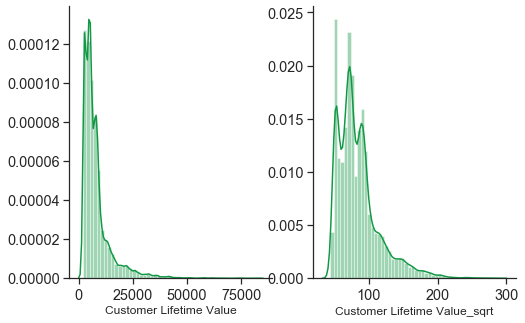

In [155]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Customer Lifetime Value'], ax = axes[0])
sns.distplot(df['Customer Lifetime Value_sqrt'], ax = axes[1])
plt.show()

The distribution is pretty much the same, but the range is smaller, as expected. Before declaring the log transformation as the winner, let’s explore one more - the Box-Cox Transformation.

##### Monthly Premium Auto

In [156]:
df['Monthly Premium Auto_sqrt'] = np.sqrt(df['Monthly Premium Auto'])
print('Before log transformation ', data['Monthly Premium Auto'].skew())
print('After log transformation ', df['Monthly Premium Auto_sqrt'].skew())

Before log transformation  2.1235464499475345
After log transformation  1.4939457662225009


The skewness coefficient sees a drop of ~0.6.

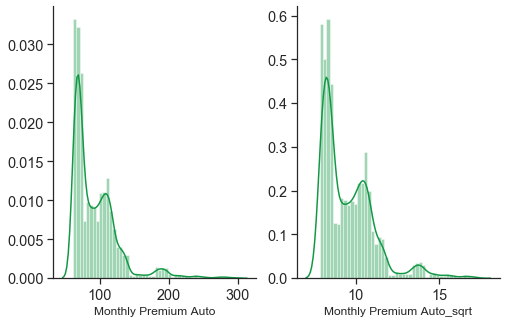

In [157]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Monthly Premium Auto'], ax = axes[0])
sns.distplot(df['Monthly Premium Auto_sqrt'], ax = axes[1])
plt.show()

The distribution is in sync with the original variable. Hence we will give the square root transformation less priority.

##### Total Claim Amount

In [158]:
df['Total Claim Amount_sqrt'] = np.sqrt(df['Total Claim Amount'])
print('Before log transformation ', data['Total Claim Amount'].skew())
print('After log transformation ', df['Total Claim Amount_sqrt'].skew())

Before log transformation  1.7149658097209557
After log transformation  0.13723126589615228


This skewness score is much better than the one we received after Log Transformation. Lets look at the visualization.

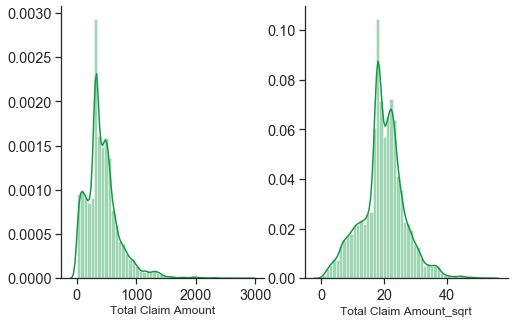

In [159]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Total Claim Amount'], ax = axes[0])
sns.distplot(df['Total Claim Amount_sqrt'], ax = axes[1])
plt.show()

The distribution is definitely very close to being normal and that is a good sign.

### Box-Cox Transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Applying a Box-Cox means that you are able to run a broader number of tests which holds to be more accurate than the Log Transformation & Square Root Transformation.

Assumption: The data should be positively skewed, which holds true in our case.

##### Customer Lifetime Value

In [160]:
df['Customer Lifetime Value_boxcox'] = stats.boxcox(df['Customer Lifetime Value'])[0]
print('Before Box-Cox transformation ', data['Customer Lifetime Value'].skew())
print('After Box-Cox transformation ', pd.Series(df['Customer Lifetime Value_boxcox'].skew()))

Before Box-Cox transformation  3.032280259929985
After Box-Cox transformation  0    0.043503
dtype: float64


Wow! The skew dropped from 3.03 to 0.04 which is lower than Log Tranformation. Still, let’s see how the transformed variable looks like:

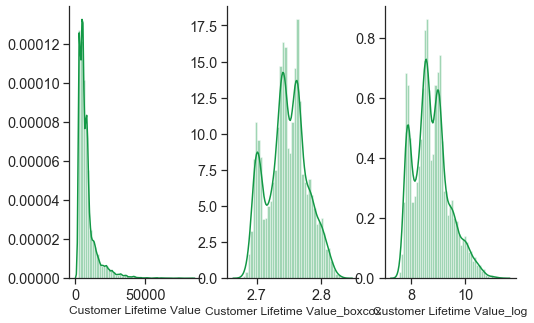

In [161]:
figure, axes = plt.subplots(1,3)
sns.distplot(data['Customer Lifetime Value'], ax = axes[0])
sns.distplot(df['Customer Lifetime Value_boxcox'], ax = axes[1])
sns.distplot(df['Customer Lifetime Value_log'], ax = axes[2])
plt.show()

The distribution is pretty similar to the one made by the log transformation, but just a touch less trimodal with smaller antinodes.

##### Monthly Premium Auto

In [162]:
df['Monthly Premium Auto_boxcox'] = stats.boxcox(df['Monthly Premium Auto'])[0]
print('Before Box-Cox transformation ', data['Monthly Premium Auto'].skew())
print('After Box-Cox transformation ', pd.Series(df['Monthly Premium Auto_boxcox'].skew()))

Before Box-Cox transformation  2.1235464499475345
After Box-Cox transformation  0    0.174589
dtype: float64


The boxcox transformation technique shows maximum drop in skewness for Monthly Premium Auto. Looking at the visualization will give us a better idea:

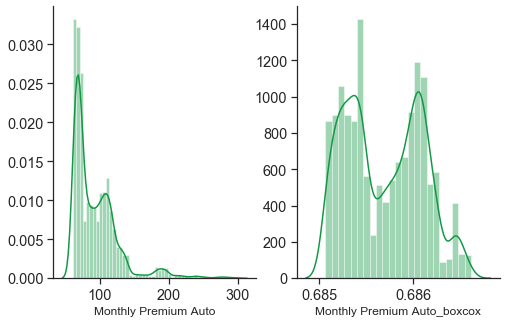

In [163]:
figure, axes = plt.subplots(1,2)
sns.distplot(data['Monthly Premium Auto'], ax = axes[0])
sns.distplot(df['Monthly Premium Auto_boxcox'], ax = axes[1])
plt.show()

The data is definitely not normal, however the trimodal distribution is more evident here.

##### Total Claim Amount

In [164]:
df['Total Claim Amount_boxcox'] = stats.boxcox(df['Total Claim Amount'])[0]
print('Before Box-Cox transformation ', data['Total Claim Amount'].skew())
print('After Box-Cox transformation ', pd.Series(df['Total Claim Amount_boxcox'].skew()))

Before Box-Cox transformation  1.7149658097209557
After Box-Cox transformation  0    0.046916
dtype: float64


Again the skewness score is better tha square root transformation.

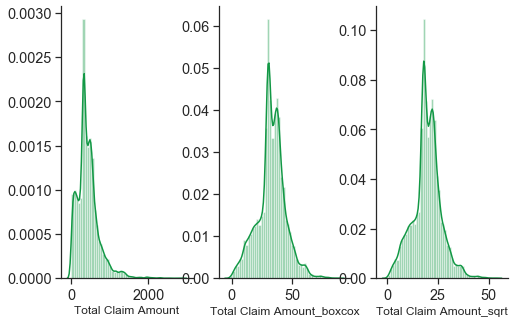

In [165]:
figure, axes = plt.subplots(1,3)
sns.distplot(data['Total Claim Amount'], ax = axes[0])
sns.distplot(df['Total Claim Amount_boxcox'], ax = axes[1])
sns.distplot(df['Total Claim Amount_sqrt'], ax = axes[2])
plt.show()

The distribution is very similar to square root transformation.

We can proceed with the data transformed using Box Cox Method. Calling out the final data set:

In [166]:
df['Customer Lifetime Value_boxcox'].shape

(9134,)

In [167]:
data_f = data1.drop(['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount'], axis = 1)
data_f = data_f.join(df['Customer Lifetime Value_boxcox'])
data_f = data_f.join(df['Monthly Premium Auto_boxcox'])
data_f = data_f.join(df['Total Claim Amount_boxcox'])
data_f.head()

,Coverage,Education,EmploymentStatus,Income,Marital Status,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Renew Offer Type,Vehicle Class,Vehicle Size,Customer Lifetime Value_boxcox,Monthly Premium Auto_boxcox,Total Claim Amount_boxcox
0,0,2,4,56274,0,32,5,0,1,3,1,1,2.703839,0.685347,33.035752
1,1,2,1,0,1,13,42,0,8,2,0,1,2.754926,0.685871,56.357614
2,2,2,4,48767,0,18,38,0,2,3,1,1,2.780772,0.686039,40.071789
3,0,2,1,0,0,18,65,0,7,3,2,1,2.759125,0.686018,38.763252
4,0,2,4,43836,1,12,44,0,1,3,0,1,2.704995,0.685461,19.560154


In [168]:
data_f.to_csv('Insurance data for model building Final.csv')

In [169]:
num_cols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Total Claim Amount']

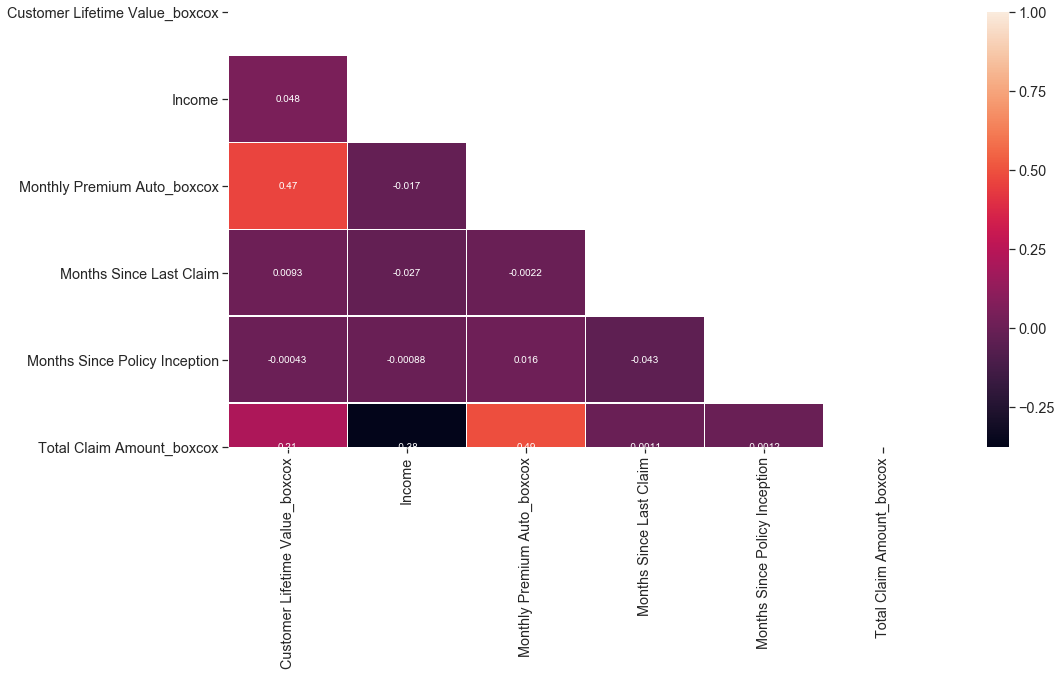

In [170]:
plt.figure(figsize = (16,8))
corr_back = data_f[['Customer Lifetime Value_boxcox', 'Income','Monthly Premium Auto_boxcox', 'Months Since Last Claim', 'Months Since Policy Inception',
 'Total Claim Amount_boxcox']].corr()
mask = np.zeros_like(corr_back, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_back, mask = mask, annot = True, linewidth = 0.5)
plt.show()

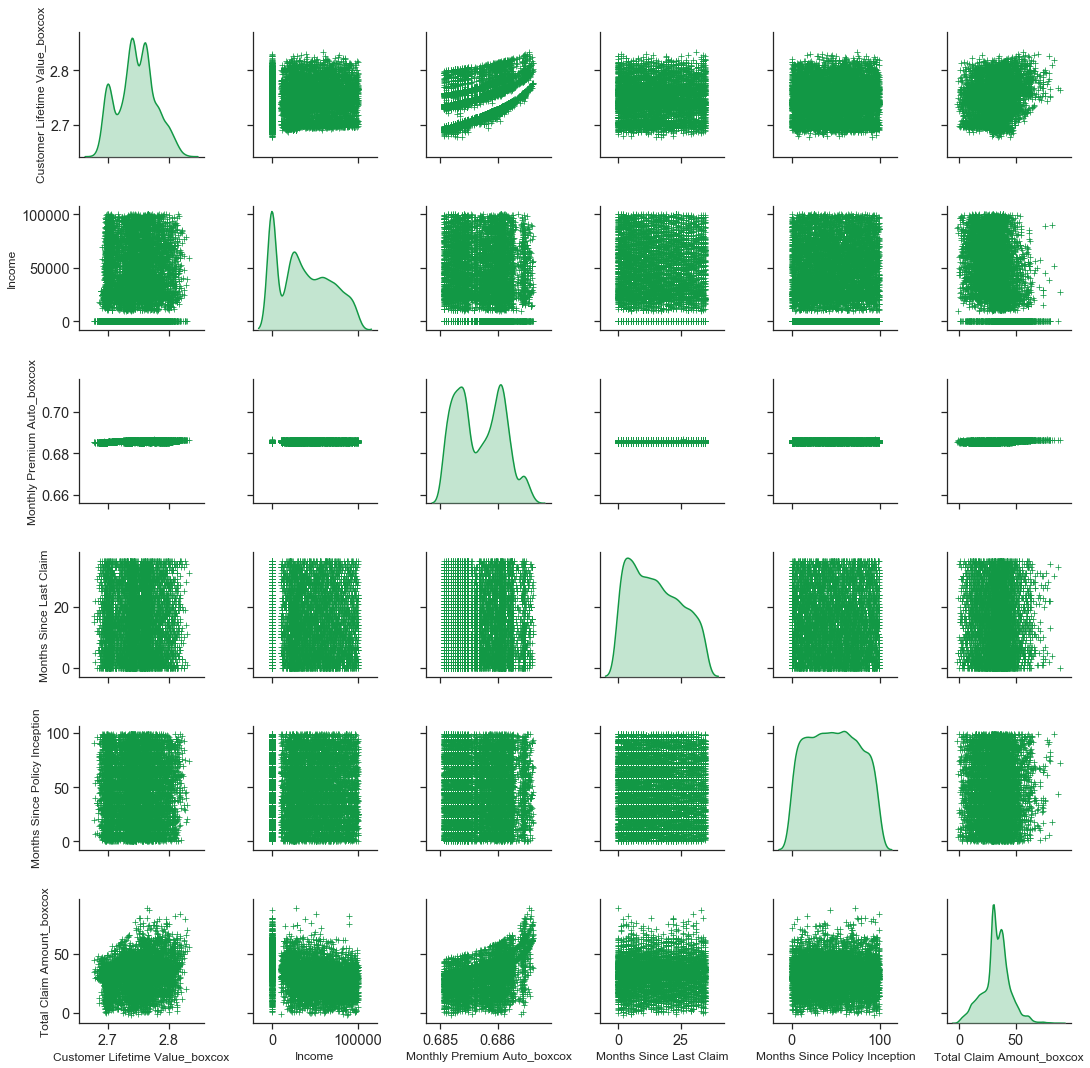

In [171]:
sns.pairplot(data_f[['Customer Lifetime Value_boxcox', 'Income','Monthly Premium Auto_boxcox', 'Months Since Last Claim', 
                     'Months Since Policy Inception', 'Total Claim Amount_boxcox']], diag_kind='kde', markers='+')
plt.show()

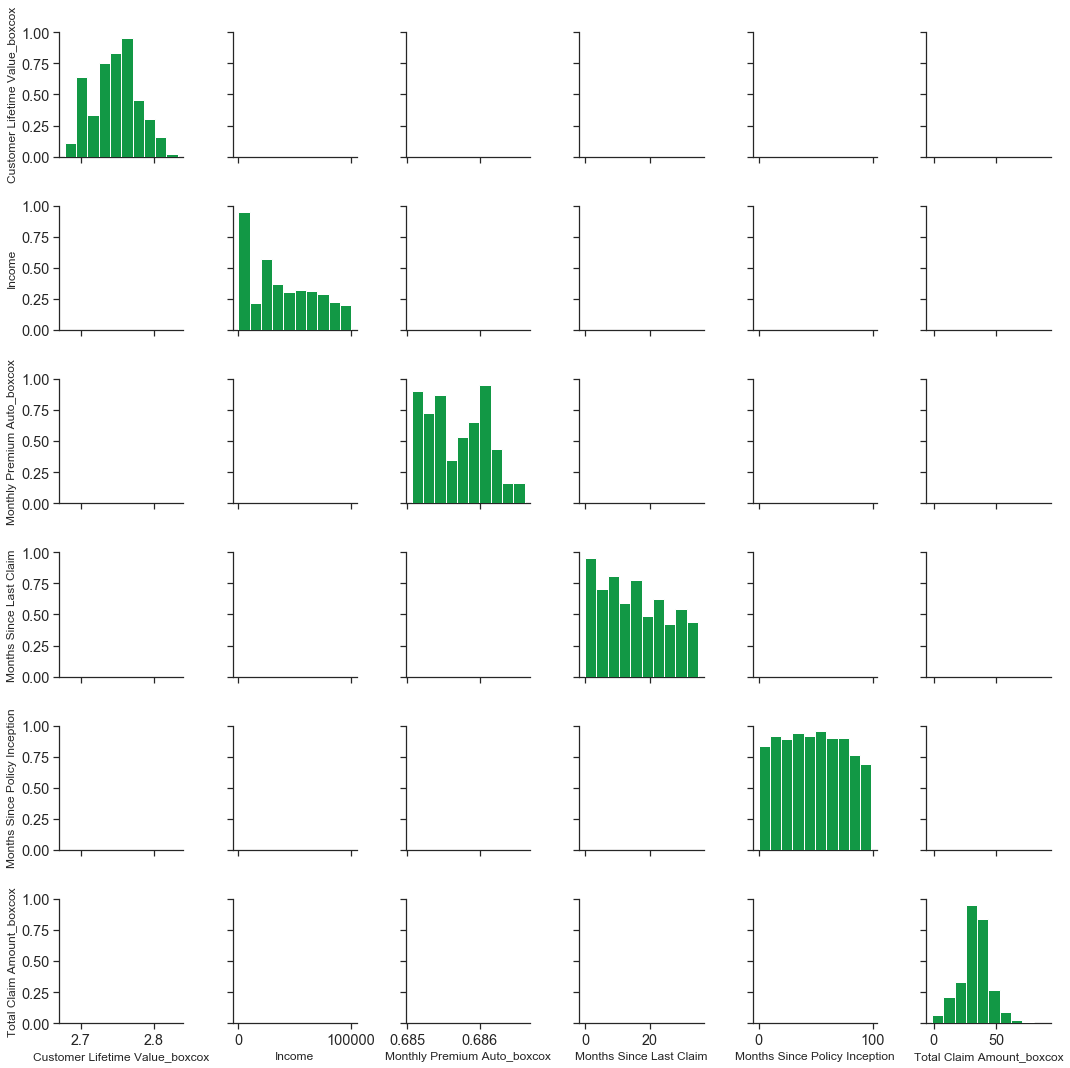

In [173]:
sns.pairplot(data_f[['Customer Lifetime Value_boxcox', 'Income','Monthly Premium Auto_boxcox', 'Months Since Last Claim', 
                     'Months Since Policy Inception', 'Total Claim Amount_boxcox']], kind = 'kde')
plt.show()